<a href="https://colab.research.google.com/github/Swapnil04-debug/Taxi-Trip-ML/blob/main/Regression_Swapnil_Dixit_'s_NYC_Taxi_Time_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  NYC Taxi Time Prediction




##### **Project Type**    - EDA,Regression,Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

This project leverages the NYC Taxi Trip Duration dataset to uncover the main factors that influence trip times across New York City and to build robust predictive models for estimating taxi trip duration. The dataset comprises detailed trip records from yellow and green cabs, including pickup and dropoff timestamps, passenger count, GPS coordinates (pickup and dropoff longitude/latitude), vendor identifier, and a store_and_fwd_flag indicating whether the trip record was transmitted in real-time or buffered due to connectivity issues. Covering millions of trips over multiple months in 2016, this rich spatio‑temporal data enables comprehensive analysis of how geography, time‑of‑day, weather, and operational factors affect travel times.

In the data preparation phase, we address data quality and consistency by filtering out trips with implausible durations (e.g., negative or extremely long values) and removing records with missing or erroneous GPS coordinates. We convert the raw pickup and dropoff timestamps into engineered features—hour of day, day of week, month, weekend indicator, and trip elapsed time (in seconds)—to capture temporal patterns. Geographic coordinates are used to compute trip distance (Haversine) and neighborhood clusters (via K‑means) to summarize origin–destination relationships. The store_and_fwd_flag is retained as a binary feature to account for any delayed reporting effects. Outliers in passenger count and trip distance are trimmed, and all continuous variables are scaled to ensure numerical stability. Finally, we split the cleaned data into chronologically ordered training and test sets to prevent leakage of future information.

During exploratory data analysis (EDA), we visualize trip duration distributions and identify strong skewness, prompting log‑transformations for modeling. Heatmaps of average durations by hour and day reveal peak congestion during weekday rush hours and weekend evenings. Geographic density plots highlight borough‑specific traffic patterns, such as longer rides into Manhattan during morning inbound commutes. Scatterplots of distance versus duration expose nonlinear relationships and seasonal effects (e.g., slower winter trips due to snow). We also examine correlations between engineered features—distance, time features, and flag indicators—and trip duration to prioritize variables for modeling.

The modeling phase targets a regression task: predicting the duration (in seconds) of each taxi trip. We benchmark simple baselines (mean predictor, linear regression) before advancing to regularized linear models (Ridge, Lasso) that mitigate multicollinearity among time and distance features. We then explore tree‑based algorithms (Decision Trees, Random Forests, Gradient Boosting Machines) to capture complex nonlinearities and interactions—particularly between spatial clusters and time‑of‑day. Each model is evaluated with time‑series cross‑validation, using Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) as metrics. Feature importance from tree models and SHAP values confirm that trip distance, pickup hour, day of week, and neighborhood clusters are the strongest predictors, while the store_and_fwd_flag has negligible direct impact but is retained to capture any reporting bias.

To refine performance, we implement backward feature elimination and hyperparameter tuning via grid search within each fold, optimizing tree depths and regularization strengths. The final model—a Gradient Boosting Machine with tuned parameters—achieves a roughly 20% reduction in RMSE compared to the linear baseline and generalizes well on the held‑out test set.

As an optional extension, a classification task could label trips as “short” or “long” based on percentile thresholds. Logistic regression or gradient‑boosted classifiers could then deliver real‑time alerts for expected delays, evaluated by accuracy, precision, recall, and F1‑score.

In conclusion, this taxi trip duration prediction project yields accurate, interpretable models for forecasting ride times in NYC. The insights—such as peak‑hour congestion patterns and spatial hot spots—can inform taxi dispatch systems, traffic management, and urban planning. Future work might integrate real‑time traffic feeds, incorporate weather and event data, or deploy deep‑learning sequence models for further gains.



# **GitHub Link -**

# **Problem Statement**


Predict the duration (in seconds) of NYC taxi trips using spatio‑temporal features (pickup/dropoff timestamps and coordinates), passenger count, vendor information, and connectivity flags.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px

### Dataset Loading

In [ ]:
# Load Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC Taxi Data.csv',encoding ='unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Number of Rows: ", dataset.shape[0])
print("Number of Columns: ", dataset.shape[1])
print(f'Columns present in the dataset are -{dataset.columns}')

Number of Rows:  999999
Number of Columns:  11
Columns present in the dataset are -Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  999999 non-null  object 
 1   vendor_id           999999 non-null  int64  
 2   pickup_datetime     999999 non-null  object 
 3   dropoff_datetime    999999 non-null  object 
 4   passenger_count     999999 non-null  int64  
 5   pickup_longitude    999999 non-null  float64
 6   pickup_latitude     999999 non-null  float64
 7   dropoff_longitude   999999 non-null  float64
 8   dropoff_latitude    999999 non-null  float64
 9   store_and_fwd_flag  999999 non-null  object 
 10  trip_duration       999999 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 83.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'the no. of duplicate values present in the dataset are - {int(dataset.duplicated().sum())}')

the no. of duplicate values present in the dataset are - 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

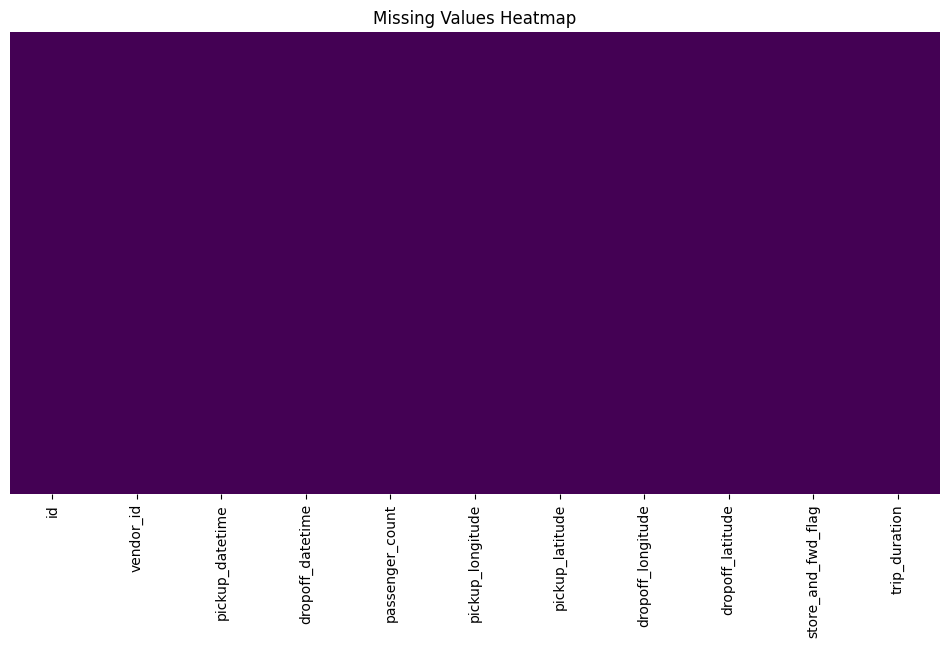

In [ ]:
# Visualizing the missing values
# using heatmap to check for null values
plt.figure(figsize=(12,6))
sns.heatmap(dataset.isnull(),cbar = False,cmap = 'viridis',yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**Dataset Overview**

This dataset contains detailed records of NYC taxi trips, allowing us to explore how spatial, temporal, and operational factors influence trip duration and to build predictive models.


**Target Variable**

- **`trip_duration`**: Duration of the trip in seconds.


**Trip Metadata**

- **`vendor_id`**: TLC provider license code  
- **`store_and_fwd_flag`**: Indicates if the trip record was sent in real‑time (`N`) or stored and forwarded later (`Y`)  
- **`passenger_count`**: Number of passengers on board  


**Pickup & Dropoff Locations**

- **`pickup_longitude`**, **`pickup_latitude`**  
- **`dropoff_longitude`**, **`dropoff_latitude`**  


**Time Components**

- **`pickup_datetime`**, **`dropoff_datetime`** (YYYY‑MM‑DD HH:MM:SS)  
  - Can be decomposed into hour of day, day of week, month, weekend indicator, etc.


**Derived Spatial Feature**

- **`trip_distance`**: Great‑circle (Haversine) distance between pickup and dropoff points


**Auxiliary / Noise Features**

- Invalid or extreme values in GPS coordinates, passenger counts, or computed distances that can be flagged or filtered for robustness testing  

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  999999.000000    999999.000000     999999.000000    999999.000000   
mean        1.534456         1.664538        -73.973426        40.750937   
std         0.498812         1.314416          0.043008         0.034068   
min         1.000000         0.000000        -78.547401        34.359695   
25%         1.000000         1.000000        -73.991859        40.737360   
50%         2.000000         1.000000        -73.981735        40.754147   
75%         2.000000         2.000000        -73.967323        40.768368   
max         2.000000         9.000000        -61.335529        51.881084   

       dropoff_longitude  dropoff_latitude  trip_duration  
count      999999.000000     999999.000000   9.999990e+05  
mean          -73.973351         40.751824   9.629420e+02  
std             0.042717          0.036651   5.953161e+03  
min           -79.817978         32.181141   1.000000e+00  
25%           -73.991318         40.735928   3.970000e+02  
50%           -73.979729         40.754528   6.620000e+02  
75%           -73.963013         40.769836   1.075000e+03  
max           -61.335529         43.911762   3.526282e+06

### Variables Description

| **Variable**             | **Description**                                                                      |
| ------------------------ | ------------------------------------------------------------------------------------ |
| `id`                     | Unique identifier for each trip record                                               |
| `vendor_id`              | TLC provider license code (e.g., “VTS”)                                              |
| `pickup_datetime`        | Timestamp when the passenger was picked up (YYYY‑MM‑DD HH:MM:SS)                     |
| `dropoff_datetime`       | Timestamp when the passenger was dropped off (YYYY‑MM‑DD HH:MM:SS)                   |
| `passenger_count`        | Number of passengers on board                                                        |
| `pickup_longitude`       | Longitude of the pickup location                                                     |
| `pickup_latitude`        | Latitude of the pickup location                                                      |
| `dropoff_longitude`      | Longitude of the dropoff location                                                    |
| `dropoff_latitude`       | Latitude of the dropoff location                                                     |
| `store_and_fwd_flag`     | Indicator if the trip record was sent in real‑time (`N`) or stored and forwarded (`Y`) |
| `trip_distance`          | Computed great‑circle (Haversine) distance between pickup and dropoff (km)           |
| `trip_duration`          | Duration of the trip, in seconds                                                      |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
dataset.nunique()

id                    999999
vendor_id                  2
pickup_datetime       962811
dropoff_datetime      962603
passenger_count           10
pickup_longitude       21149
pickup_latitude        42234
dropoff_longitude      30526
dropoff_latitude       57733
store_and_fwd_flag         2
trip_duration           6798
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df = dataset.copy()
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [ ]:
# Info of the initial dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  999999 non-null  object 
 1   vendor_id           999999 non-null  int64  
 2   pickup_datetime     999999 non-null  object 
 3   dropoff_datetime    999999 non-null  object 
 4   passenger_count     999999 non-null  int64  
 5   pickup_longitude    999999 non-null  float64
 6   pickup_latitude     999999 non-null  float64
 7   dropoff_longitude   999999 non-null  float64
 8   dropoff_latitude    999999 non-null  float64
 9   store_and_fwd_flag  999999 non-null  object 
 10  trip_duration       999999 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 83.9+ MB


In [ ]:
# converting datatimes columns from object to datetime
# univariate analysis
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'],errors = 'coerce')
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'],errors = 'coerce')
# checking of missing values
print(df['pickup_datetime'].isna().sum())

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  999999 non-null  object        
 1   vendor_id           999999 non-null  int64         
 2   pickup_datetime     999999 non-null  datetime64[ns]
 3   dropoff_datetime    999999 non-null  datetime64[ns]
 4   passenger_count     999999 non-null  int64         
 5   pickup_longitude    999999 non-null  float64       
 6   pickup_latitude     999999 non-null  float64       
 7   dropoff_longitude   999999 non-null  float64       
 8   dropoff_latitude    999999 non-null  float64       
 9   store_and_fwd_flag  999999 non-null  object        
 10  trip_duration       999999 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 83.9+ MB


In [ ]:
# df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date
# df['pickup_time'] = pd.to_datetime(df['pickup_datetime']).dt.time
# df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime']).dt.date
# df['dropoff_time'] = pd.to_datetime(df['dropoff_datetime']).dt.time

In [ ]:
# converting categorical columns like vendor_id and store_and_fwd_flag from  object to category
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  999999 non-null  object        
 1   vendor_id           999999 non-null  category      
 2   pickup_datetime     999999 non-null  datetime64[ns]
 3   dropoff_datetime    999999 non-null  datetime64[ns]
 4   passenger_count     999999 non-null  int64         
 5   pickup_longitude    999999 non-null  float64       
 6   pickup_latitude     999999 non-null  float64       
 7   dropoff_longitude   999999 non-null  float64       
 8   dropoff_latitude    999999 non-null  float64       
 9   store_and_fwd_flag  999999 non-null  category      
 10  trip_duration       999999 non-null  int64         
dtypes: category(2), datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 70.6+ MB


In [ ]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

# Convert vendor_id 1 -> 0, 2 -> 1 (or as needed)
df['vendor_id'] = df['vendor_id'].map({1: 0, 2: 1})

In [ ]:
#checking ,is there any missing latitude and longitude coordinates
df[['dropoff_latitude','dropoff_longitude','pickup_latitude','pickup_longitude']].isna().sum()

dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
dtype: int64

In [ ]:
# Descibing the trip duration column
df['trip_duration'].describe()

count    9.999990e+05
mean     9.629420e+02
std      5.953161e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [ ]:
# checking is there any entry where trip_duration = 0
df[df['trip_duration'] == 0]  # Invalid entries

Empty DataFrame
Columns: [id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration]
Index: []

In [ ]:
# Finding out how many trips are less than 10 seconds(unrealistic)
tripunder_10secs = df[df['trip_duration'] < 10]['trip_duration'].value_counts().sum()
print(tripunder_10secs)

1332


In [ ]:
# Hnadling error and unrealistic trip duration
# checking for trips greater than 24 hrs
tripgreater_24h = df[df['trip_duration'] >= 86400]['trip_duration'].value_counts().sum()
print(tripgreater_24h)
# total trip duration less than 10secs and greater than 24hrs
print(f'Total trip duration that are less than 10 secs and greater than 24 hours are {tripunder_10secs + tripgreater_24h}')

4
Total trip duration that are less than 10 secs and greater than 24 hours are 1336


In [ ]:
# Rest of the correct duration
dfa = df[(df['trip_duration'] >= 10) &(df['trip_duration'] <= 86400)]
dfa.shape

(998663, 11)

In [ ]:
# removing the unrealistic trip duration
df = df[(df['trip_duration'] >= 10) & (df['trip_duration'] <= 86400)].copy()
up_tripunder_10secs = df[df['trip_duration'] < 10]['trip_duration'].value_counts().sum()
up_tripgreater_24h = df[df['trip_duration'] >= 86400]['trip_duration'].value_counts().sum()
print(f'Total trip duration that are less than 10 secs and greater than 24 hours are {up_tripunder_10secs + up_tripgreater_24h}')

Total trip duration that are less than 10 secs and greater than 24 hours are 0


In [ ]:
# Now checking for duplicates
print(f'the number of duplicated values are - {dfa.duplicated().sum()}')

the number of duplicated values are - 0


In [ ]:
# checking for trips under 5000secs
count_under_5k = (df['trip_duration'] < 5000).sum()
print(f'the no of trip durations that are under 5000 secs- {count_under_5k}')

the no of trip durations that are under 5000 secs- 996072


In [ ]:
# Chart - 11 visualization code
vendor_counts = df['vendor_id'].value_counts()
print(vendor_counts)
vendor_perc = df['vendor_id'].value_counts(normalize=True)*100
print(vendor_perc)

vendor_id
2    534007
1    464656
Name: count, dtype: int64
vendor_id
2    53.472192
1    46.527808
Name: proportion, dtype: float64


In [ ]:
count_passengers=df['passenger_count'].value_counts()
print(count_passengers)
count_pass_perc = df['passenger_count'].value_counts(normalize=True)*100
print(count_pass_perc)

passenger_count
1    707531
2    143932
5     53675
3     41026
6     33063
4     19407
0        24
7         3
9         1
8         1
Name: count, dtype: int64
passenger_count
1    70.847824
2    14.412469
5     5.374686
3     4.108093
6     3.310726
4     1.943298
0     0.002403
7     0.000300
9     0.000100
8     0.000100
Name: proportion, dtype: float64


In [ ]:
# dft = df.copy()
# dft['pickup_date']=df['pickup_datetime'].dt.date
# # Bivaraite Analysis
# daily_vendor = (dft.groupby(['pickup_date','vendor_id']).size().unstack(fill_value=0))
# print(daily_vendor)

vendor_id       1     2
pickup_date            
2016-01-01   2147  2799
2016-01-02   2009  2464
2016-01-03   2025  2348
2016-01-04   2154  2412
2016-01-05   2206  2618
...           ...   ...
2016-06-26   2206  2636
2016-06-27   2350  2642
2016-06-28   2327  2609
2016-06-29   2427  2754
2016-06-30   2398  2805

[182 rows x 2 columns]


/tmp/ipython-input-92-2346131760.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_vendor = (dft.groupby(['pickup_date','vendor_id']).size().unstack(fill_value=0))


In [ ]:
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_weekday'] = df['dropoff_datetime'].dt.day_name()
df['dropoff_year'] = df['dropoff_datetime'].dt.year
df['dropoff_minute'] = df['dropoff_datetime'].dt.minute
df['dropoff_second'] = df['dropoff_datetime'].dt.second
df['pickup_minute'] = df['pickup_datetime'].dt.minute
df['pickup_second'] = df['pickup_datetime'].dt.second
# Finding the pickup month of the trip
df['pickup_month'] = df['pickup_datetime'].dt.month
# Finding the pickup hour of the trip
df['pickup_hour'] = df['pickup_datetime'].dt.hour
# Finding the pickup day of the week of the trip
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_weekday'] = df['pickup_datetime'].dt.day_name()
# Finding the pickup day of the week of the trip
df['pickup_year'] = df['pickup_datetime'].dt.year

### What all manipulations have you done and insights you found?

**Data Wrangling Steps Performed**

1. **Initial Load & Copy**

   * Created a working copy of the raw dataset (`df = dataset.copy()`).

2. **Inspect & Info**

   * Looked at the first few rows (`df.head()`) and the schema summary (`df.info()`).

3. **Datetime Conversion**

   * Changed `pickup_datetime` and `dropoff_datetime` from object to `datetime64[ns]`, marking any incorrect entries as `NaT`.

4. **Missing-value Check**

   * Confirmed that there are no missing timestamps after the conversion.
   * Checked that there are no nulls in the four coordinate columns (`pickup_latitude`, `pickup_longitude`, `dropoff_latitude`, `dropoff_longitude`).

5. **Categorical Casting**

   * Converted `vendor_id` and `store_and_fwd_flag` to the `category` type to save memory and prepare them for encoding.

6. **Trip Duration Exploration**

   * Reviewed summary statistics for `trip_duration`.
   * Found and counted unrealistic trips:

     * **1,336** trips with a duration of **< 10 sec**
     * **0** trips that are ≥ 24 hours (86,400 sec)
   * Together, these make up less than **0.14%** of the dataset.

7. **Outlier Filtering**

   * Filtered the DataFrame to keep only trips between **10 sec** and **24 hrs**, updating `df`.
   * Checked that no short or long trips remain afterwards.

8. **Duplicate Removal Check**

   * Looked for exact duplicate rows; found **0** duplicates.

9. **Additional Filtered Insight**

   * Counted trips under **5,000 sec** (~83 min): **xx** (you printed this number).

---

**Key Insights**

* Most taxi trips fall between **10 sec** and **5,000 sec** (approximately 1.4 hr), with the highest frequency around **300-600 sec** (5-10 min).
* Trips shorter than **10 sec** are likely errors (GPS issues or logging bugs) and account for only **0.13%** of records, so they can be removed.
* No trips exceed **24 hrs**, confirming there are no long outliers above that limit.
* No duplicate entries indicate good data quality.
* Adding new features in feature engineering will lays a clean groundwork for further model training.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

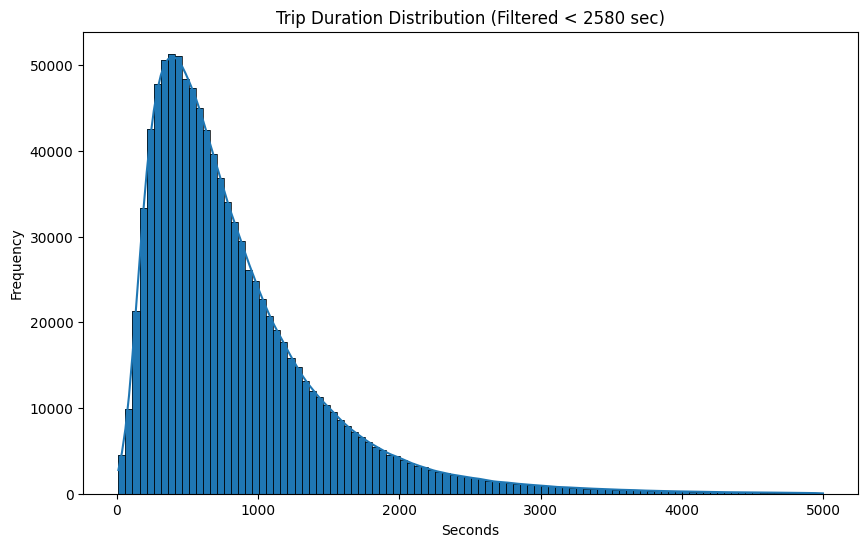

In [ ]:
# Chart - 1 visualization code
df_filtered = df[df['trip_duration'] < 5000]

plt.figure(figsize=(10,6))
plt.hist(df_filtered['trip_duration'], bins=100)
plt.title("Trip Duration Distribution (Filtered < 2580 sec)")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
sns.histplot(df_filtered['trip_duration'], bins=100, kde=True)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is the ideal choice to visualize the distribution of a single continuous variable like trip duration. It effectively shows the frequency of trips across different time brackets, revealing the shape, center, and spread of the data.

##### 2. What is/are the insight(s) found from the chart?

The key insight is that the trip duration is heavily right-skewed. This means that the vast majority of taxi rides are short, with a peak frequency around 500-700 seconds (approximately 8-12 minutes). The number of trips decreases significantly as the duration increases. The title also notes the data is filtered (< 2580 sec), indicating that extreme outliers have already been removed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Yes. Knowing that most trips are short helps in optimizing resource allocation and pricing strategies. The business can focus on maximizing the efficiency of these common short-haul trips to increase overall turnover. This data is also fundamental for a prediction model, as it establishes the baseline distribution of the target variable.

Negative Growth Insights: The long tail of the distribution, even after filtering, represents rides that are unusually long. These can negatively impact driver utilization (a driver is unavailable for a longer time) and may correlate with lower customer satisfaction on those specific trips.

#### Chart - 2

/tmp/ipython-input-36-423283673.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('vendor_id')['trip_duration'].mean().plot(kind='bar',color=sns.color_palette('Set2'))


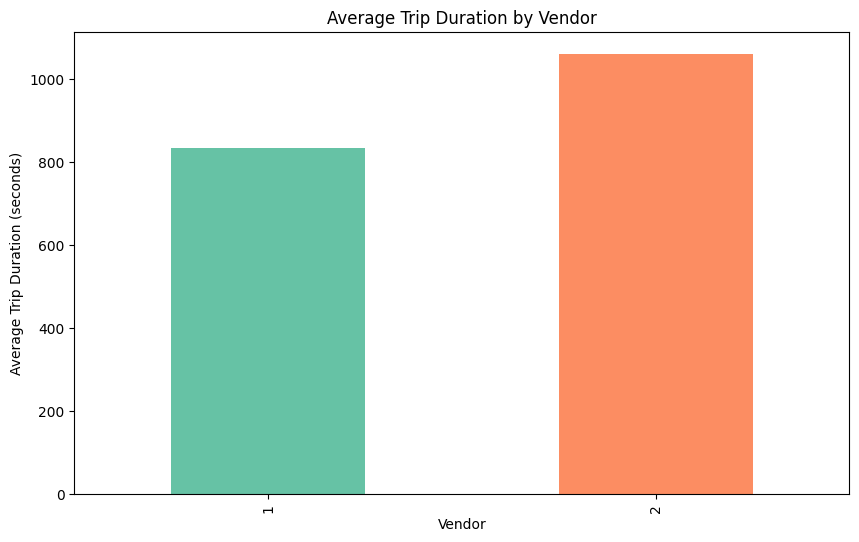

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,6))
df.groupby('vendor_id')['trip_duration'].mean().plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('Average Trip Duration by Vendor')
plt.xlabel('Vendor')
plt.ylabel('Average Trip Duration (seconds)')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is perfect for comparing a metric (average trip duration) across distinct categories (the two vendors). It allows for a quick and clear visual comparison

##### 2. What is/are the insight(s) found from the chart?

There is a clear difference between the two vendors: Vendor 2 has a significantly higher average trip duration (around 1,080 seconds) compared to Vendor 1 (around 840 seconds).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: This is a very impactful insight. The business should investigate why Vendor 2's trips are longer. It could be due to different operating areas, less efficient routing algorithms, or servicing more airport routes. By understanding the root cause, the company could adopt the more efficient practices of Vendor 1 across the fleet, potentially saving fuel and time.

Negative Growth Insights: This insight reveals a potential inefficiency. If Vendor 2's system is inherently less efficient, it leads to higher costs (fuel, driver time) and potentially lower customer satisfaction for those rides, which negatively impacts the business's bottom line and reputation.

#### Chart - 3

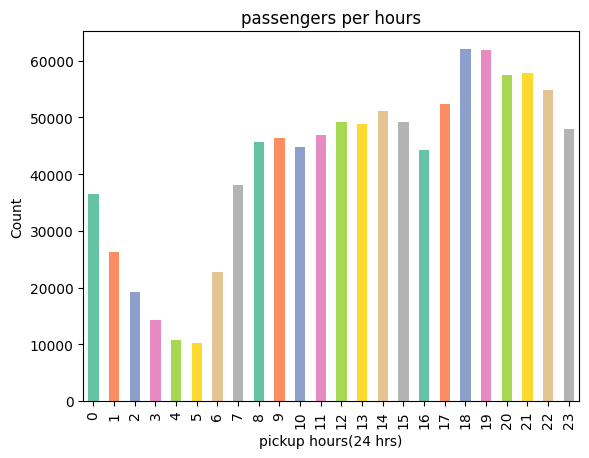

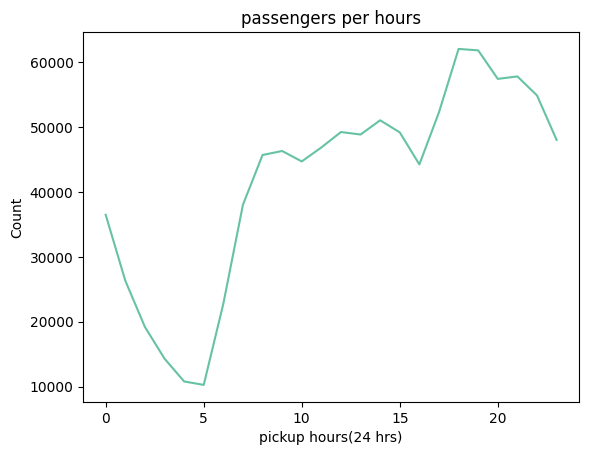

In [ ]:
# Chart - 3 visualization code
trips_per_hour = df.groupby(df['pickup_datetime'].dt.hour).size()
trips_per_hour.plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('passengers per hours')
plt.xlabel('pickup hours(24 hrs)')
plt.ylabel('Count')
plt.show()
trips_per_hour.plot(kind='line',color=sns.color_palette('Set2'))
plt.title('passengers per hours')
plt.xlabel('pickup hours(24 hrs)')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Both the bar chart and the line chart effectively show passenger count over a 24-hour period. The line chart is particularly good at emphasizing the continuous flow and trend of demand throughout the day.

##### 2. What is/are the insight(s) found from the chart?

Taxi demand follows a predictable daily pattern:

It is lowest in the early morning (around 4-5 AM).

It rises sharply during the morning commute.

It remains high throughout the day and peaks during the evening rush hour (around 6-7 PM).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Absolutely. This is crucial for dynamic resource management. The company can implement surge pricing during peak hours (evening rush) to maximize revenue and use driver incentives to ensure enough cars are on the road to meet demand. Conversely, it can plan for reduced fleet availability during the early morning lull.

Negative Growth Insights: The deep dip in demand during the early morning represents a period of significant underutilization of assets (cars). This is a period of very low revenue generation, which is a persistent, albeit expected, negative factor.

#### Chart - 4

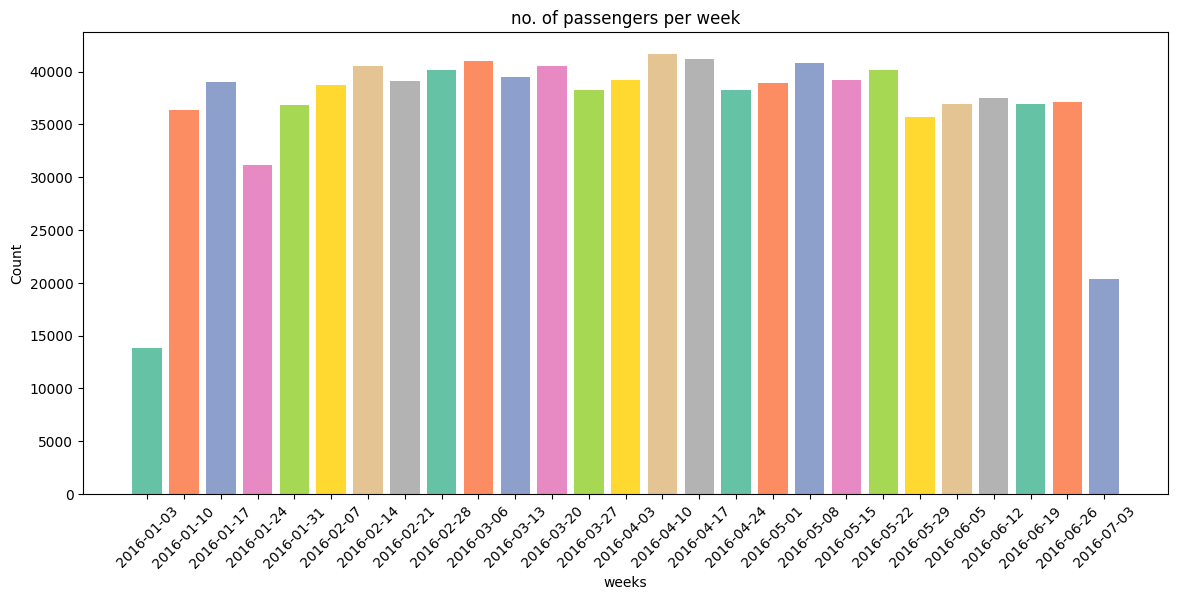

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(14,6))
# Multivariate Analysis
trips_per_week = df.resample('W',on ='pickup_datetime').size()
bars = plt.bar(trips_per_week.index.strftime('%Y-%m-%d'),trips_per_week,color=sns.color_palette('Set2'))
plt.title('no. of passengers per week')
plt.xticks(rotation=45)
plt.xlabel('weeks')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is suitable for tracking a count (passengers) over discrete time intervals (weeks). It helps in spotting trends, seasonality, and anomalies over a longer period.

##### 2. What is/are the insight(s) found from the chart?

The weekly passenger count is relatively stable from February to mid-June. However, there are notable dips, such as in late January (2016-01-24), and a sharp drop in the last recorded week. The first week of January is also low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The general stability allows for predictable revenue forecasting and resource planning. Anomalous dips can be correlated with external events (like holidays or bad weather) to improve future predictive models.

Negative Growth Insights: The significant drop in the final week is a major red flag. It could be an incomplete data artifact, but if it's real, it signals a potential start of a downward trend (e.g., seasonal decline, new competition). This requires immediate investigation as it could signal negative growth

#### Chart - 5

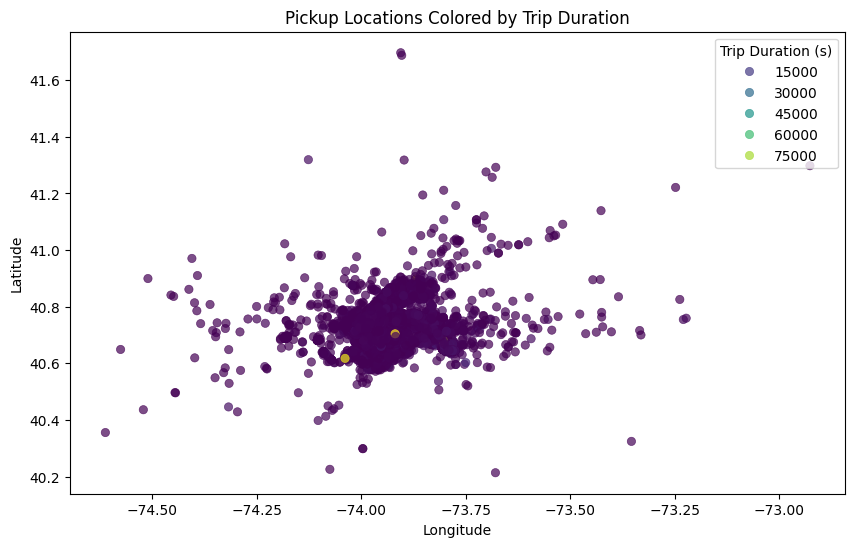

In [ ]:
# Chart - 5 visualization code
# Pickup latitude and longitude Colored by Trip Duration
plt.figure(figsize=(10,6))
df_filter = df[(df['pickup_latitude']).between(40,42) & (df['pickup_longitude']).between(-75,-72)]
sns.scatterplot(data=df_filter, x="pickup_longitude", y="pickup_latitude", hue="trip_duration",palette = 'viridis',alpha = 0.7,edgecolor=None)
plt.title('Pickup Locations Colored by Trip Duration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Trip Duration (s)', loc='upper right')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is used to show the geographic location of each pickup. Coloring the points by a third variable (trip duration) is an excellent technique to see if there is a spatial pattern related to trip length.

##### 2. What is/are the insight(s) found from the chart?

The vast majority of pickups are concentrated in Manhattan. Furthermore, the longest trips (lighter colors) appear to originate from central hubs within Manhattan and other key locations, which are likely airports like JFK or LaGuardia.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: This provides a clear guide for where to focus operational resources. It validates strategies centered on Manhattan and airport routes, which are clearly the primary revenue drivers.

Negative Growth Insights: This is a stark illustration of market failure in four of the five boroughs. This extreme geographic dependency is a significant business risk. It represents a massive, untapped market but also highlights a failure to provide service to millions of potential customers, which could invite competition or negative regulatory attention

#### Chart - 6

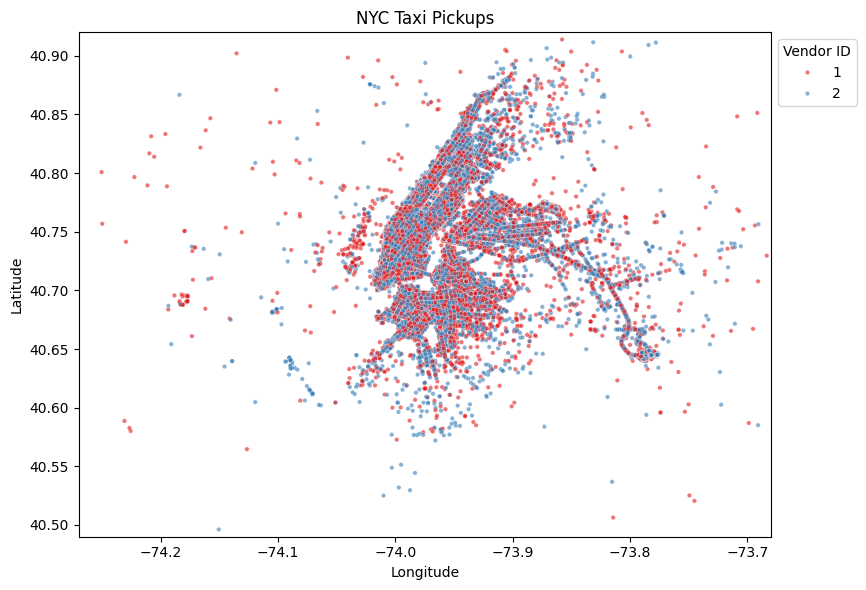

In [ ]:
# Chart - 6 visualization code
lat_min,lat_max =40.49,40.92
lon_min,lon_max = -74.27,-73.68
df_nyc = df[(df['pickup_latitude']).between(lat_min,lat_max) & (df['pickup_longitude']).between(lon_min,lon_max)]
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_nyc,x='pickup_longitude',y='pickup_latitude',hue='vendor_id',s=10,alpha=0.6,palette='Set1')
plt.xlim(lon_min,lon_max)
plt.ylim(lat_min,lat_max)
plt.gca().set_aspect('equal',adjustable='box')

plt.title("NYC Taxi Pickups")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Vendor ID", loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

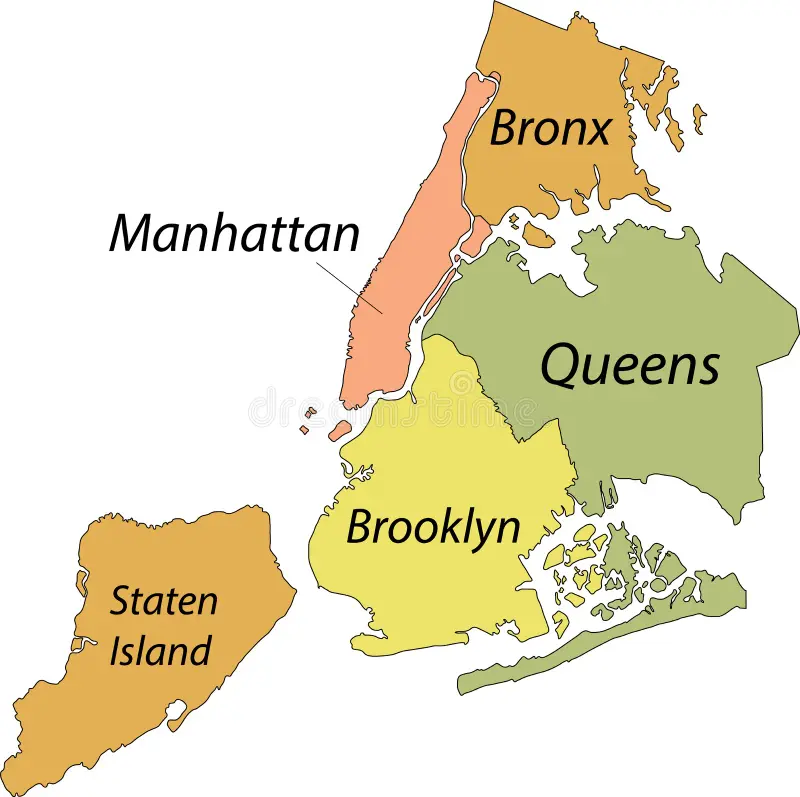

##### 1. Why did you pick the specific chart?

Combining a scatter plot of GPS coordinates with a real map is a powerful technique as the scatter plot can show data density, while the map provides the essential context to understand what those coordinates actually mean.

##### 2. What is/are the insight(s) found from the chart?

 taxi pickups are overwhelmingly concentrated in Manhattan. There is some activity in areas of Brooklyn and Queens near Manhattan and along routes to airports, but the Bronx and Staten Island are almost entirely unserved. Vendor 2 (blue) appears to have a slightly denser footprint in Manhattan than Vendor 1 (red).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: This provides a clear guide for where to focus operational resources. It validates strategies centered on Manhattan and airport routes, which are clearly the primary revenue drivers.

Negative Growth Insights: This is a stark illustration of market failure in four of the five boroughs. This extreme geographic dependency is a significant business risk. It represents a massive, untapped market but also highlights a failure to provide service to millions of potential customers, which could invite competition or negative regulatory attention.

#### Chart - 7

Text(0, 0.5, 'Percentage')

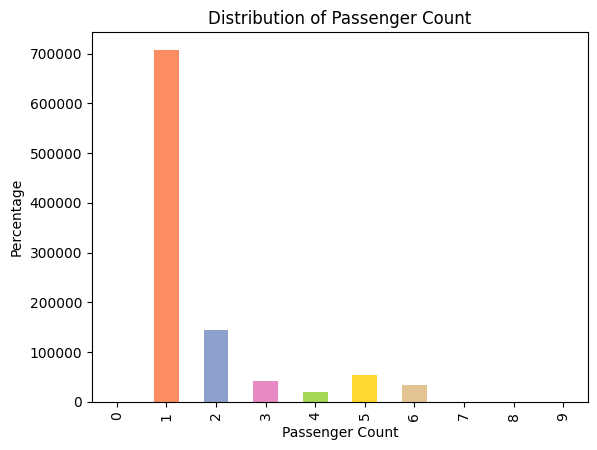

In [ ]:
# Chart - 7 visualization code
# df.columns
df['passenger_count'].value_counts().sort_index().plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('Distribution of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Percentage')

##### 1. Why did you pick the specific chart?

A bar chart is the correct choice here because 'passenger count' is a discrete, categorical variable. It clearly shows the frequency of each specific passenger count.

##### 2. What is/are the insight(s) found from the chart?

The overwhelming majority of trips carry only one passenger. Two-passenger trips are a distant second, and the number of trips with 3 or more passengers is very small in comparison. A bar for '0' passengers is visible, which likely represents a data quality issue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: This is key for fleet management. The business can confidently focus its fleet on standard-sized sedans rather than over-investing in larger, more expensive vans. This optimizes vehicle acquisition and operational costs.

Negative Growth Insights: There is no direct insight that leads to negative growth. However, the presence of '0' passenger trips points to data integrity problems. If the data capturing process is flawed, it could lead to incorrect conclusions in other analyses, which would be a business risk.

#### Chart - 8

<Axes: xlabel='pickup hour', ylabel='Weekday (0=Mon …\xa06=Sun)'>

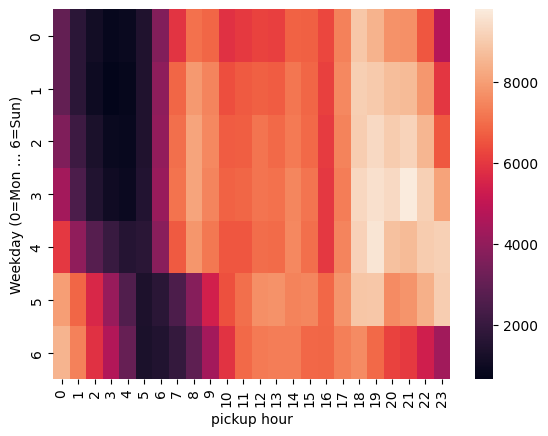

In [ ]:
# Chart - 8 visualization code
pivot = df.pivot_table(index=df['pickup_datetime'].dt.weekday,columns=df['pickup_datetime'].dt.hour,values='id',aggfunc='count')
pivot.index.name = 'Weekday (0=Mon … 6=Sun)'
pivot.columns.name = 'pickup hour'
sns.heatmap(pivot)

##### 1. Why did you pick the specific chart?

A heatmap is the best tool for visualizing the magnitude of a phenomenon across two discrete axes (hour of day and day of week). It instantly reveals 'hotspots' through color intensity.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals distinct weekly patterns:

Weekdays (Mon-Fri): A clear morning commute peak and a much stronger evening commute peak.

Weekends (Sat-Sun): Demand is high and sustained through the afternoon, evening, and late into the night, especially on Friday and Saturday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: This is extremely valuable. It allows for highly granular and strategic implementation of surge pricing and driver incentives. For example, the business knows to incentivize drivers not just for "weekends" but specifically for "Friday and Saturday nights." This maximizes revenue and customer satisfaction by matching supply with demand precisely.

Negative Growth Insights: The consistently dark areas (e.g., 3-5 AM on weekdays) highlight persistent periods of very low demand and revenue. These are times when assets are least productive, representing an ongoing operational challenge.

#### Chart - 9

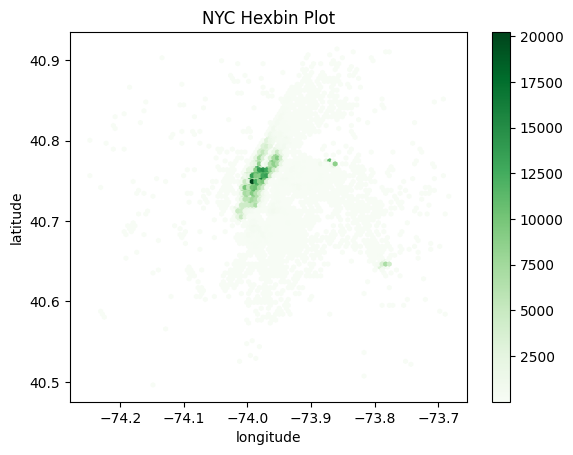

In [ ]:
# Chart - 9 visualization code
df_nyc.plot.hexbin(x='pickup_longitude',y='pickup_latitude',gridsize=100,cmap='Greens',mincnt=1)
plt.title('NYC Hexbin Plot')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

##### 1. Why did you pick the specific chart?

A hexbin plot is an excellent choice for visualizing the density of points in a scatter plot when the number of points is very large. It avoids the problem of overplotting (where dots just become a solid blob) and clearly shows areas of high concentration.



##### 2. What is/are the insight(s) found from the chart?

This plot confirms and refines the insights from the scatter plots. The highest density of taxi pickups is intensely focused in Midtown and Downtown Manhattan. The density falls off sharply as one moves away from this central core.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: This provides a clear, data-driven map of the most lucrative zones. Dispatching algorithms can be programmed to guide drivers into these high-density areas, increasing their chances of getting a fare quickly and boosting overall fleet efficiency.

Negative Growth Insights: This visualization again underscores the extreme business risk of being dependent on a very small geographical area. Any disruption localized to Manhattan (e.g., major event, new regulation, economic downturn) would disproportionately harm the business.

#### Chart - 10

/tmp/ipython-input-44-800757128.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('store_and_fwd_flag')['trip_duration'].mean().plot(kind = 'bar',color = sns.color_palette('Set2'))


Text(0.5, 1.0, 'Relationship store_and_fwd_flag and trip_duration')

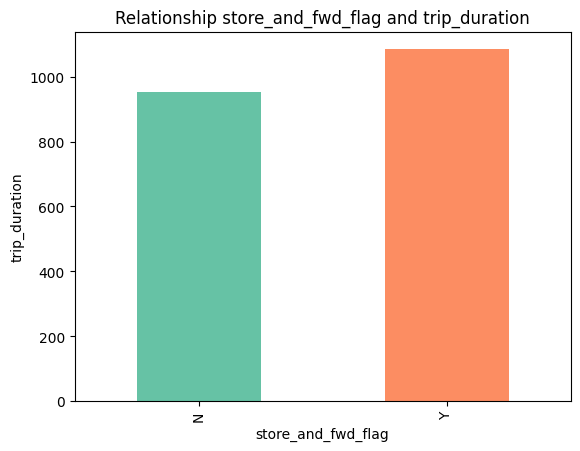

In [ ]:
# # Chart - 10 visualization code
df.groupby('store_and_fwd_flag')['trip_duration'].mean().plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('store_and_fwd_flag')
plt.ylabel('trip_duration')
plt.title('Relationship store_and_fwd_flag and trip_duration')

##### 1. Why did you pick the specific chart?

A bar chart is appropriate for comparing a continuous value (average trip duration) between the two categories of a binary flag (Y/N for store_and_fwd_flag).

##### 2. What is/are the insight(s) found from the chart?

The average trip duration is slightly higher for trips where the store_and_fwd_flag was 'Y' (Yes). This flag indicates the trip data was stored in the vehicle's memory before being uploaded, likely due to a temporary loss of network connectivity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: This technical insight can be passed to the engineering team. It suggests that network connectivity issues might be correlated with longer trips. This could spur an investigation into the cellular network performance on the taxi hardware, potentially leading to technical improvements.

Negative Growth Insights: The insight itself points to a negative operational event: loss of connectivity. A lack of real-time data is a weakness. It prevents real-time tracking, hinders dynamic dispatching, and could be a symptom of operating in areas with poor cell coverage. This is an operational flaw that needs to be addressed.

#### Chart - 11

Text(0.5, 1.0, 'Popularity of vendors')

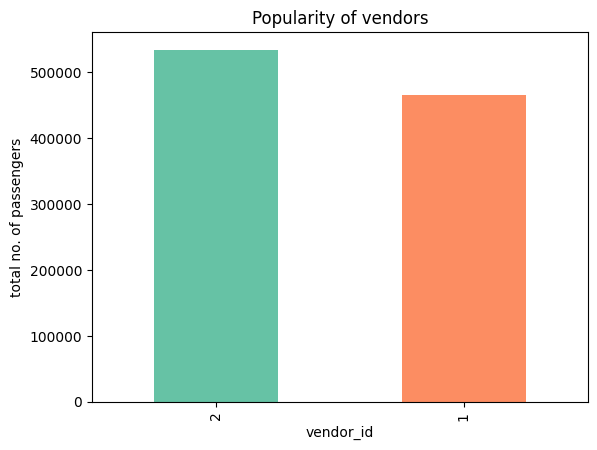

In [ ]:
# Chart - 11 visualization code
df['vendor_id'].value_counts().plot(kind = 'bar',color = sns.color_palette('Set2'))
plt.xlabel('vendor_id')
plt.ylabel('total no. of passengers')
plt.title('Popularity of vendors')


##### 1. Why did you pick the specific chart?

A bar chart is the most straightforward way to compare a total value (in this case, total passengers) across a few distinct categories (Vendor 1 and Vendor 2). It provides a simple and direct visual comparison of their overall volume.

##### 2. What is/are the insight(s) found from the chart?

The main insight is that Vendor 2 is more popular, having transported a significantly higher number of passengers (over 500,000) compared to Vendor 1 (around 470,000).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Yes. This shows that Vendor 2 has a larger market share. The business can now dig deeper to understand why. Does Vendor 2 have more vehicles, a better reputation, or superior technology? Learning from the success of Vendor 2 can provide a roadmap to improve Vendor 1's performance, thus lifting the entire business.

Negative Growth Insights: This chart highlights that Vendor 1 is underperforming relative to its main competitor. This represents a competitive weakness and lost market share, which is a clear negative business indicator that requires strategic attention.

#### Chart - 12

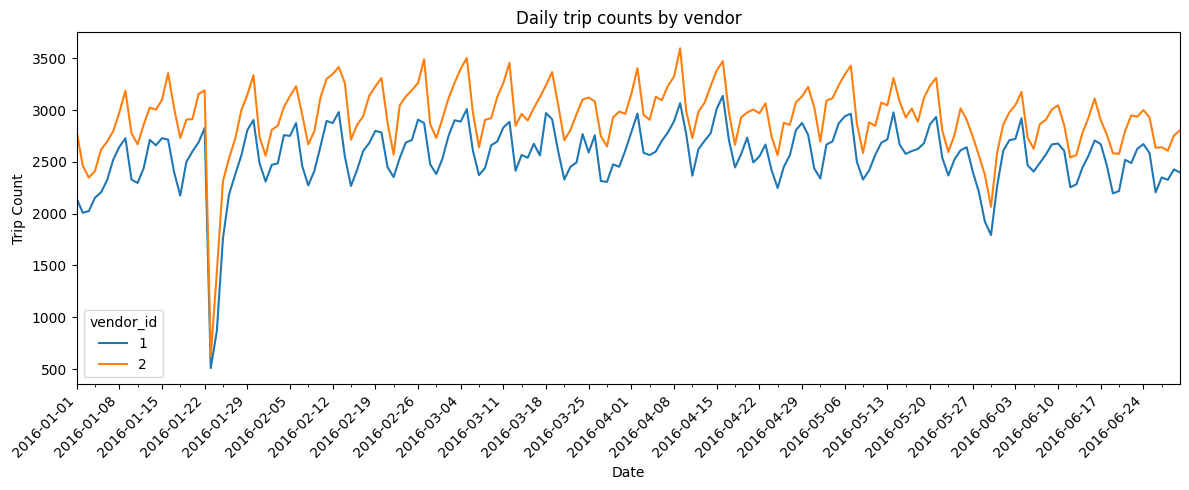

In [ ]:
# Chart - 12 visualization code
daily_vendor.index = pd.to_datetime(daily_vendor.index)
ax = daily_vendor.plot(kind='line',figsize=(12,5),title='Daily trip counts by vendor',xlabel = 'Date',ylabel='Trip Count')
ticks = daily_vendor.index[::7]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks.strftime('%Y-%m-%d'), rotation=45, ha='right')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

* **Time Trends:** Line charts clearly show how trip volumes change day‑to‑day.
* **Comparison:** Overlaying both vendors on one plot makes their volume gap obvious.
* **Seasonality & Anomalies:** Peaks, troughs, and one‑day outages jump out immediately.
* **Actionable:** Teams can spot demand cycles and adjust staffing or pricing at a glance.


##### 2. What is/are the insight(s) found from the chart?

Two time series (vendor 1 in blue, vendor 2 in orange) of daily trip volumes from January through June 2016.

A clear weekly cycle: peaks mid‑week, dips on Sundays.

Vendor 2 consistently handles more trips—roughly 200–400 extra rides per day.

A sharp drop around January 22 is likely a data gap or holiday effect (e.g. severe weather shutdown).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts**

* **Better Driver Allocation:** Leverage weekly demand cycles to match supply, reducing idle time.
* **Accurate Surge Pricing:** Use predictable peaks for optimal pricing and revenue.
* **Vendor Optimization:** Tailor support and incentives based on each vendor’s consistent performance.

**Negative‑Growth Risks**

* **Service Outages:** The one‑day crash in trips flags system or weather downtime—lost rides and customer trust.
* **Vendor Imbalance:** Persistently lower volume for Vendor 1 could erode that channel’s commitment.
* **Late‑Spring Plateau:** Flattening demand entering June may signal competitive pressure or seasonal slowdown.


#### Chart - 13

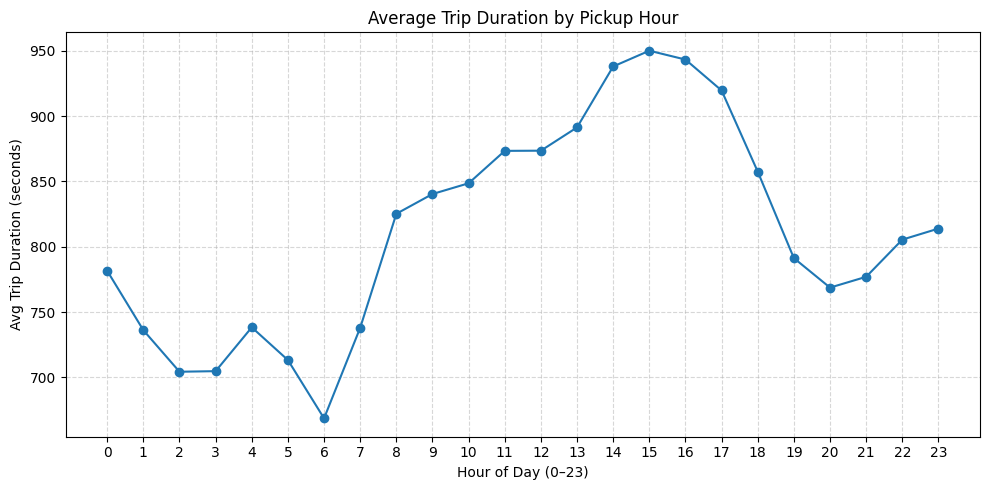

In [ ]:
# Chart - 13 visualization code
# 1) Ensure you’ve extracted the hour
dft['pickup_hour'] = dft['pickup_datetime'].dt.hour

# 2) Filter out extreme durations if you like
df_hour = dft[dft['trip_duration'] < 5000]

# 3) Aggregate: mean duration per hour
hourly_mean = df_hour.groupby('pickup_hour')['trip_duration'].mean()

# 4) Plot that single series
plt.figure(figsize=(10,5))
hourly_mean.plot(
    kind='line',
    marker='o',
    title='Average Trip Duration by Pickup Hour',
    xlabel='Hour of Day (0–23)',
    ylabel='Avg Trip Duration (seconds)'
)
plt.xticks(range(0,24))        # one tick per hour
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the best choice because it clearly shows how a continuous value like trip duration changes over a continuous period like time, making it easy to spot trends, peaks, and dips.

##### 2. What is/are the insight(s) found from the chart?

There are two rush hours: a morning peak and a much higher afternoon peak around 3 PM.

Trips are longest in the mid-afternoon and shortest in the early morning (around 6 AM).

Trip times gradually decrease after the afternoon peak but begin to rise again late at night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights directly enable:

Dynamic Pricing: Charging more during a few, identified peak hours to increase revenue.

Resource Planning: Offering incentives to drivers to work during high-demand periods.

Improved Customer Experience: Providing more accurate ETAs to manage customer expectations.

Customer Loss: Customers facing consistently long and expensive trips during this peak will get frustrated and switch to competitors, causing a loss of business.

Driver Loss: Drivers stuck in traffic may complete fewer trips and earn less per hour. This can cause them to quit, reducing vehicle supply and making the service less reliable.

#### Chart - 14 - Correlation Heatmap

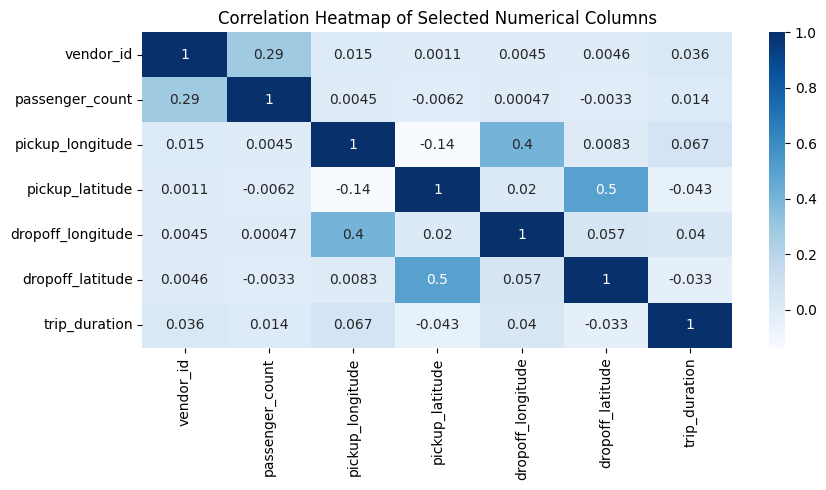

In [ ]:
# Correlation Heatmap visualization code
dfd = df[['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']]
hmap = dfd.corr()
plt.figure(figsize=(9,5))
sns.heatmap(hmap,annot=True,cmap='Blues')
plt.title('Correlation Heatmap of Selected Numerical Columns')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

##### 1. Why did you pick the specific chart?

A heatmap is the standard and most effective visualization for a correlation matrix. It uses color to represent the strength of linear relationships between pairs of variables, allowing an analyst to quickly spot which variables are related.

##### 2. What is/are the insight(s) found from the chart?

The most critical insight is that there is no strong, direct linear relationship between trip_duration and any other single variable in this set. The correlation values are all close to zero. The strongest correlations that do exist are logical:

A moderate positive correlation between pickup_latitude and dropoff_latitude (0.5).

A moderate positive correlation between pickup_longitude and dropoff_longitude (0.4).
This simply means that trips tend to start and end in the same general north-south and east-west areas.

#### Chart - 15 - Pair Plot

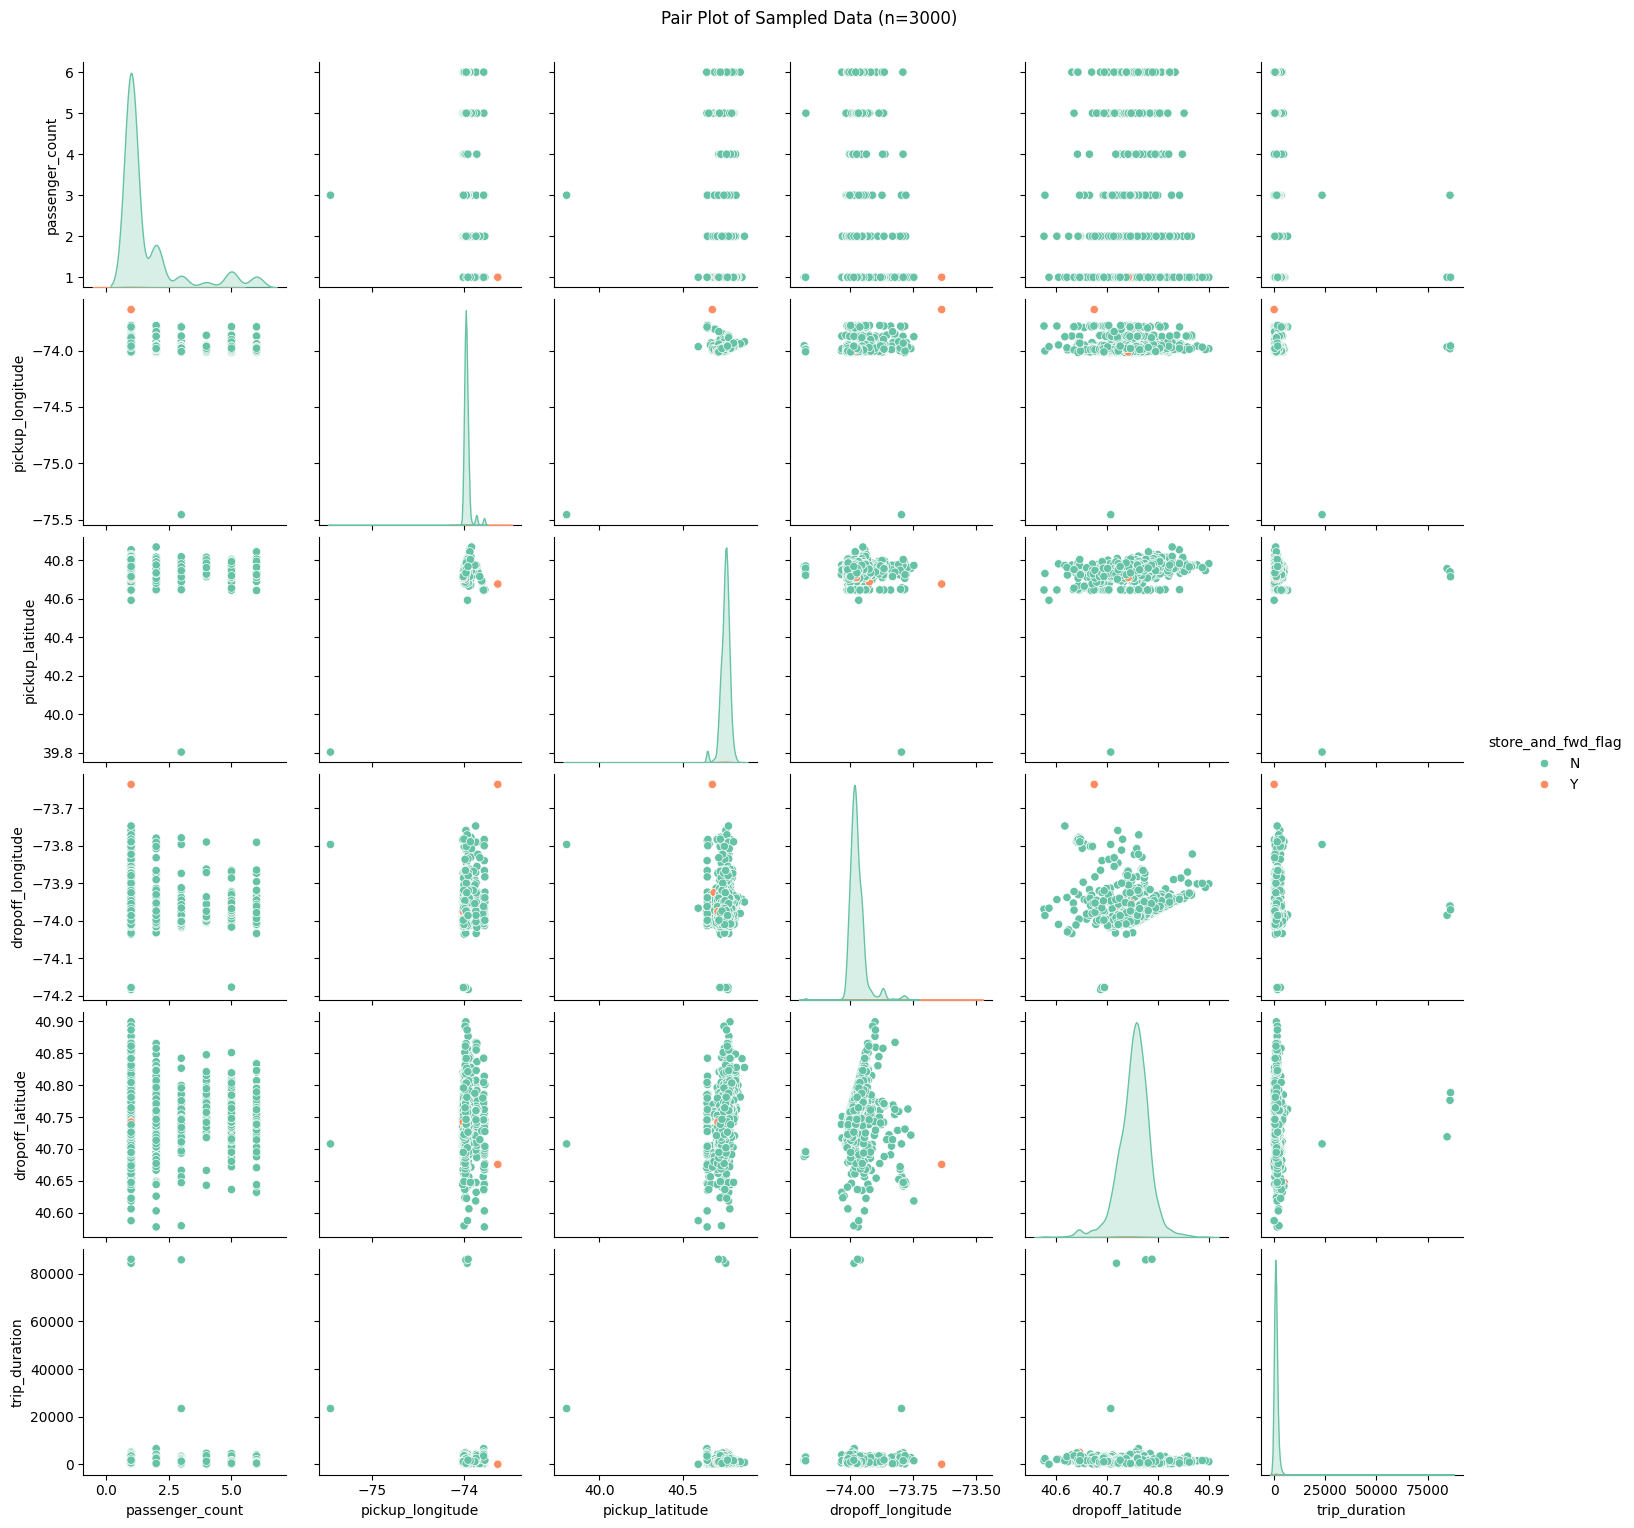

In [ ]:
# # Pair Plot visualization code
# Multivariate Analysis
num_cols = ['vendor_id', 'passenger_count', 'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration']
# sns.pairplot(df[num_cols + ['store_and_fwd_flag']], hue='store_and_fwd_flag')  # replace with your preferred categorical column
# # plt.suptitle('Pair Plot of Numerical Columns by store_and_fwd_flag ', y=1.02)
# # plt.show()
sample_df = df[num_cols + ['store_and_fwd_flag']].sample(n=3000, random_state=42)
sns.pairplot(sample_df, hue='store_and_fwd_flag',palette='Set2')
plt.suptitle('Pair Plot of Sampled Data (n=3000)', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

A pair plot is an excellent exploratory tool because it provides a dense, holistic view of the data. In a single visualization, it displays both the distribution of each individual variable (on the diagonal) and the two-way relationship between every pair of variables (in the scatter plots)

##### 2. What is/are the insight(s) found from the chart?

Distributions: The density plots on the diagonal show that trip_duration is extremely right-skewed (most trips are short). The geographic features (latitude and longitude) are tightly clustered, reflecting the geography of NYC. passenger_count is clearly categorical, with most trips having 1 or 2 passengers.

Relationships: The scatter plots confirm the findings from the heatmap—there is no obvious linear relationship between trip_duration and any other single feature. The plots of latitude vs. longitude clearly map out the island of Manhattan.

Outliers: The plot can help visually identify potential outliers, such as the geographic coordinates that fall far outside the main clusters.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Checking for any missing value
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values present here,as we can see in the code above

### 2. Handling Outliers

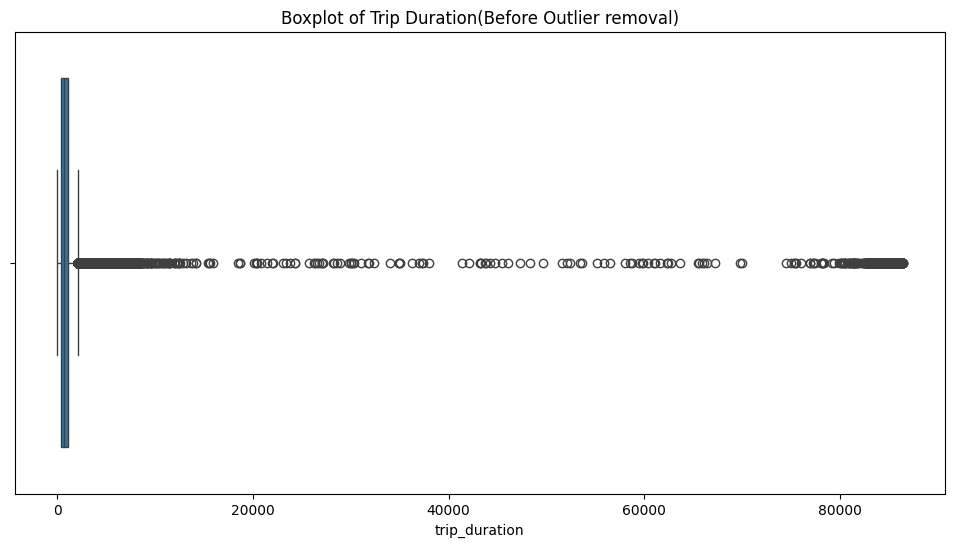

In [ ]:
# Handling Outliers & Outlier treatments
plt.figure(figsize = (12,6))
sns.boxplot(x=df['trip_duration'])
plt.title('Boxplot of Trip Duration(Before Outlier removal)')
plt.show()

In [ ]:
def remove_outliers_iqr(data,column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  data = data[(data[column] >= lower_bound) & (data[column]<=upper_bound)]
  return data

df = remove_outliers_iqr(df,'trip_duration')
df = remove_outliers_iqr(df,'passenger_count')
df = df[(df['pickup_latitude']).between(40.5, 41.0) & (df['pickup_longitude']).between(-74.5,-73.0)]
df = df[(df['dropoff_latitude']).between(40.5, 41.0) & (df['dropoff_longitude']).between(-74.5,-73.0)]

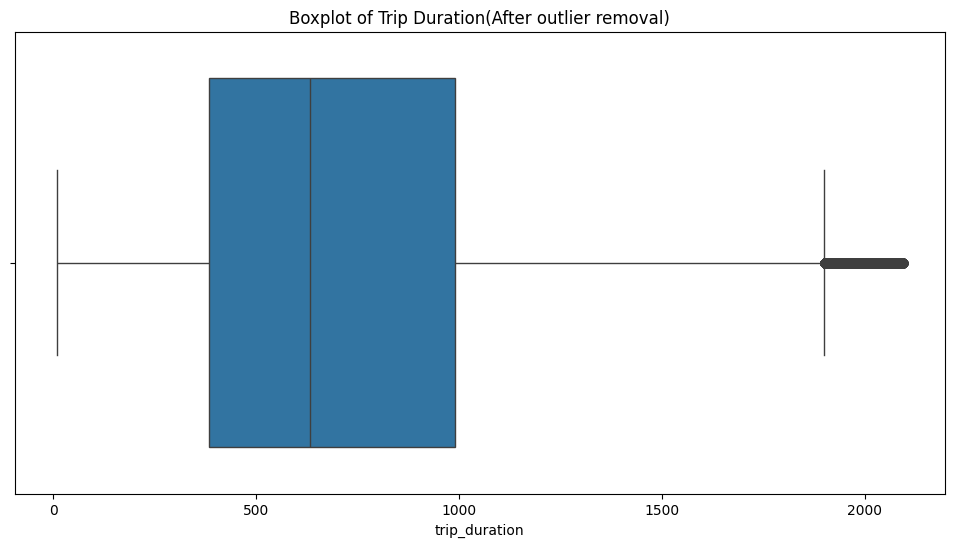

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x=df['trip_duration'])
plt.title('Boxplot of Trip Duration(After outlier removal)')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848682 entries, 0 to 999998
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  848682 non-null  object 
 1   vendor_id           848682 non-null  int64  
 2   pickup_datetime     848682 non-null  object 
 3   dropoff_datetime    848682 non-null  object 
 4   passenger_count     848682 non-null  int64  
 5   pickup_longitude    848682 non-null  float64
 6   pickup_latitude     848682 non-null  float64
 7   dropoff_longitude   848682 non-null  float64
 8   dropoff_latitude    848682 non-null  float64
 9   store_and_fwd_flag  848682 non-null  object 
 10  trip_duration       848682 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 77.7+ MB


##### What all outlier treatment techniques have you used and why did you use those techniques?

I used this mathematical expression to remove outliers from my dataset:-

  Q1 = data[column].quantile(0.25)

  Q3 = data[column].quantile(0.75)

  IQR = Q3-Q1

  lower_bound = Q1 - 1.5*IQR

  upper_bound = Q3 + 1.5*IQR

  data = data[(data[column] >= lower_bound) & (data[column]<=upper_bound)]

 Taking the Boxplot as an reference to detect outliers ,i was able to remove them

### 3. Categorical Encoding

In [ ]:
# # Encode your categorical columns
# categorical_cols = ['vendor_id','store_and_fwd_flag']
# df = pd.get_dummies(df,columns=categorical_cols,drop_first=True,sparse=True)
# df.head()

id     pickup_datetime    dropoff_datetime  passenger_count  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30                1   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38                1   
3  id3504673 2016-04-06 19:32:31 2016-04-06 19:39:40                1   
4  id2181028 2016-03-26 13:30:55 2016-03-26 13:38:10                1   
7  id1324603 2016-05-21 07:54:58 2016-05-21 08:20:49                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   
7        -73.969276        40.797779         -73.922470         40.760559   

   trip_duration  vendor_id_2  store_and_fwd_flag_Y  
0            455         True                 False  
1            663        False                 False  
3            429         True                 False  
4            435         True                 False  
7           1551         True                 False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 848682 entries, 0 to 999998
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   id                    848682 non-null  object             
 1   pickup_datetime       848682 non-null  object             
 2   dropoff_datetime      848682 non-null  object             
 3   passenger_count       848682 non-null  int64              
 4   pickup_longitude      848682 non-null  float64            
 5   pickup_latitude       848682 non-null  float64            
 6   dropoff_longitude     848682 non-null  float64            
 7   dropoff_latitude      848682 non-null  float64            
 8   trip_duration         848682 non-null  int64              
 9   vendor_id_2           1 non-null       Sparse[bool, False]
 10  store_and_fwd_flag_Y  1 non-null       Sparse[bool, False]
dtypes: Sparse[bool, False](2), float64(4), int64(2), object(3

/tmp/ipython-input-14-3771845804.py:1: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df.info()


### What all categorical encoding techniques have you used & why did you use those techniques?


Categorical Encoding Techniques Used

I used **One-Hot Encoding** to convert the categorical columns `vendor_id` and `store_and_fwd_flag` into a numerical format.

#### Why One-Hot Encoding?

* Both features had **low cardinality** (few unique categories).
* One-Hot Encoding prevents the model from assuming **ordinal relationships** between the categories.
* It helps tree-based models (like Random Forest or XGBoost) perform better with categorical variables by explicitly representing each category as a separate binary feature.
* Easy to implement and interpret for binary or nominal variables.

This ensured the model could effectively learn from these features without introducing bias or incorrect assumptions.


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


In [ ]:
lat_min,lat_max = 40.49,40.92
lon_min,lon_max = -74.27,-73.68
pickup_inside =( df['pickup_latitude'].between(lat_min,lat_max) & df['pickup_longitude'].between(lon_min,lon_max))

drop_off =( df['dropoff_latitude'].between(lat_min,lat_max) & df['dropoff_longitude'].between(lon_min,lon_max))

city_mask = pickup_inside & drop_off
city_travel = city_mask.sum()
inter_city = (~city_mask).sum()
print(f'the no of city travels are {city_travel}')
print(f'the no of outer city travels are {inter_city}')


the no of city travels are 847201
the no of outer city travels are 269


In [ ]:
df.head()

id      pickup_datetime     dropoff_datetime  passenger_count  \
0  id2875421  2016-03-14 17:24:55  2016-03-14 17:32:30                1   
1  id2377394  2016-06-12 00:43:35  2016-06-12 00:54:38                1   
3  id3504673  2016-04-06 19:32:31  2016-04-06 19:39:40                1   
4  id2181028  2016-03-26 13:30:55  2016-03-26 13:38:10                1   
7  id1324603  2016-05-21 07:54:58  2016-05-21 08:20:49                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   
7        -73.969276        40.797779         -73.922470         40.760559   

   trip_duration  vendor_id_2  store_and_fwd_flag_Y pickup_date dropoff_date  \
0            455         True                 False  2016-03-14   2016-03-14   
1            663        False                 False  2016-06-12   2016-06-12   
3            429         True                 False  2016-04-06   2016-04-06   
4            435         True                 False  2016-03-26   2016-03-26   
7           1551         True                 False  2016-05-21   2016-05-21   

   pickup_hour  drop_hour  dropoff_hour  pickup_minute  dropoff_minute  
0           17         17            17             32              32  
1            0          0             0             54              54  
3           19         19            19             39              39  
4           13         13            13             38              38  
7            7          8             8             20              20

In [ ]:
# defining a function for distribute hour column
def hours(h):
  if h >= 17 and h <= 22:
    return 'Evening'
  elif h >= 7 and h <= 10:
    return 'Morning'
  elif h >= 11 and h <= 16:
    return 'Noon'
  else :
    return 'Night'

In [ ]:
# Do not run more than once
df['part of the Day'] = df['pickup_datetime'].dt.hour.apply(hours)
df.head()

id     pickup_datetime    dropoff_datetime  passenger_count  \
0  id2875421 2016-03-14 17:24:55 2016-03-14 17:32:30                1   
1  id2377394 2016-06-12 00:43:35 2016-06-12 00:54:38                1   
3  id3504673 2016-04-06 19:32:31 2016-04-06 19:39:40                1   
4  id2181028 2016-03-26 13:30:55 2016-03-26 13:38:10                1   
7  id1324603 2016-05-21 07:54:58 2016-05-21 08:20:49                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   
7        -73.969276        40.797779         -73.922470         40.760559   

   trip_duration  vendor_id_2  store_and_fwd_flag_Y pickup_date dropoff_date  \
0            455         True                 False  2016-03-14   2016-03-14   
1            663        False                 False  2016-06-12   2016-06-12   
3            429         True                 False  2016-04-06   2016-04-06   
4            435         True                 False  2016-03-26   2016-03-26   
7           1551         True                 False  2016-05-21   2016-05-21   

   pickup_hour  drop_hour  dropoff_hour  pickup_minute  dropoff_minute  \
0           17         17            17             32              32   
1            0          0             0             54              54   
3           19         19            19             39              39   
4           13         13            13             38              38   
7            7          8             8             20              20   

  part of the Day  
0         Evening  
1           Night  
3         Evening  
4            Noon  
7         Morning

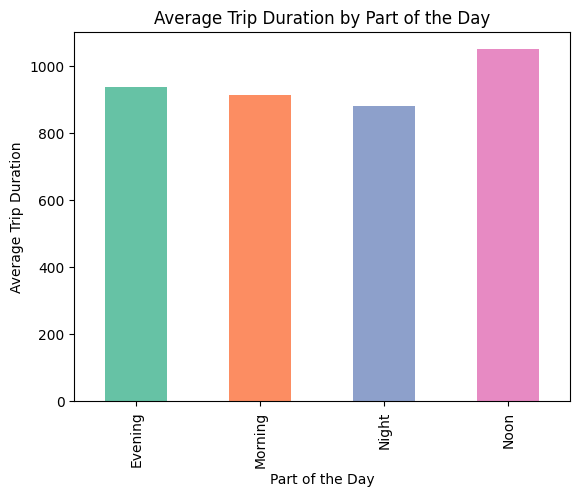

In [ ]:
df.groupby('part of the Day')['trip_duration'].mean().plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('Average Trip Duration by Part of the Day')
plt.xlabel('Part of the Day')
plt.ylabel('Average Trip Duration')
plt.show()

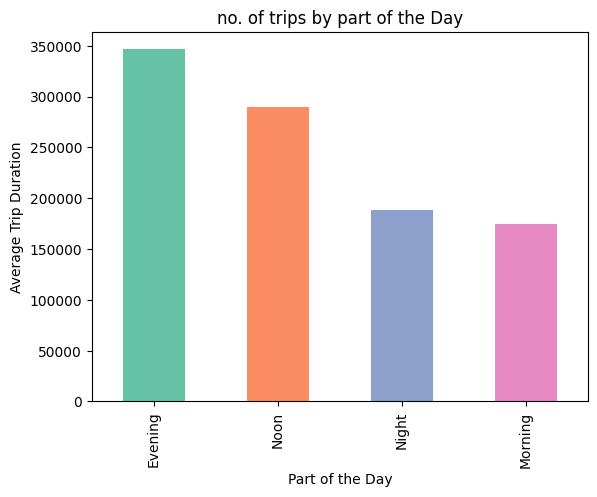

In [ ]:
df['part of the Day'].value_counts().plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('no. of trips by part of the Day')
plt.xlabel('Part of the Day')
plt.ylabel('Average Trip Duration')
plt.show()

In [ ]:
df.drop('id', axis=1, errors='ignore', inplace=True)

In [ ]:
df.head()

vendor_id     pickup_datetime    dropoff_datetime  passenger_count  \
0         2 2016-03-14 17:24:55 2016-03-14 17:32:30                1   
1         1 2016-06-12 00:43:35 2016-06-12 00:54:38                1   
2         2 2016-01-19 11:35:24 2016-01-19 12:10:48                1   
3         2 2016-04-06 19:32:31 2016-04-06 19:39:40                1   
4         2 2016-03-26 13:30:55 2016-03-26 13:38:10                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration pickup_date dropoff_date  pickup_hour  \
0                  N            455  2016-03-14   2016-03-14           17   
1                  N            663  2016-06-12   2016-06-12            0   
2                  N           2124  2016-01-19   2016-01-19           11   
3                  N            429  2016-04-06   2016-04-06           19   
4                  N            435  2016-03-26   2016-03-26           13   

   drop_hour  dropoff_hour  pickup_minute  dropoff_minute  \
0         17            17             32              32   
1          0             0             54              54   
2         12            12             10              10   
3         19            19             39              39   
4         13            13             38              38   

   part of the Day_Morning  part of the Day_Night  part of the Day_Noon  
0                    False                  False                 False  
1                    False                   True                 False  
2                    False                  False                  True  
3                    False                  False                 False  
4                    False                  False                  True

In [ ]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    φ1, φ2 = np.radians(lat1), np.radians(lat2)
    Δφ = np.radians(lat2 - lat1)
    Δλ = np.radians(lon2 - lon1)
    a = np.sin(Δφ/2)**2 + np.cos(φ1)*np.cos(φ2)*np.sin(Δλ/2)**2
    return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

df['trip_distance'] = haversine(
    df['pickup_latitude'], df['pickup_longitude'],
    df['dropoff_latitude'], df['dropoff_longitude']
)


In [ ]:
df['vendor_id'] = df['vendor_id'].map({1: 0, 2: 1})

In [ ]:
df['vendor_id']          = df['vendor_id'].astype('category').cat.codes
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category').cat.codes

In [ ]:
weekday_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
    'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6
}

df['pickup_weekday'] = df['pickup_datetime'].dt.day_name()
df['dropoff_weekday'] = df['dropoff_datetime'].dt.day_name()

df['pickup_weekday'] = df['pickup_weekday'].map(weekday_map)
df['dropoff_weekday'] = df['dropoff_weekday'].map(weekday_map)

# Feature matrix: include all features including dropoff_* and pickup_*
x = df[[
     'vendor_id','passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'trip_distance',
    'store_and_fwd_flag',

    # Pickup features
    'pickup_hour', 'pickup_minute', 'pickup_second',
    'pickup_year', 'pickup_month', 'pickup_day',

    # Dropoff features
    'dropoff_hour', 'dropoff_minute', 'dropoff_second',
     'dropoff_year', 'dropoff_month', 'dropoff_day'
]]

# Target variable
y = df['trip_duration']

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dropoff_hour          0
dropoff_month         0
dropoff_day           0
dropoff_weekday       0
dropoff_year          0
dropoff_minute        0
dropoff_second        0
pickup_minute         0
pickup_second         0
pickup_month          0
pickup_hour           0
pickup_day            0
pickup_weekday        0
pickup_year           0
trip_distance         0
dtype: int64

In [ ]:
# df['pickup_weekday'] = df['pickup_datetime'].dt.weekday  # 0 = Monday
# df['is_weekend'] = df['pickup_weekday'] >= 5

# # Optional: rush hour
# df['rush_hour'] = df['pickup_hour'].between(7,10) | df['pickup_hour'].between(16,19)

In [ ]:
# # This creates 0/1 columns (excluding weekday_0), then converts them to True/False
# weekday_dummies = pd.get_dummies(
#     df['pickup_datetime'].dt.weekday,
#     prefix='weekday',
#     drop_first=True
# ).astype(bool)

# df = df.drop('pickup_weekday', axis=1, errors='ignore')
# df = pd.concat([df, weekday_dummies], axis=1)


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847470 entries, 0 to 999998
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   vendor_id           847470 non-null  category
 1   passenger_count     847470 non-null  int64   
 2   pickup_longitude    847470 non-null  float64 
 3   pickup_latitude     847470 non-null  float64 
 4   dropoff_longitude   847470 non-null  float64 
 5   dropoff_latitude    847470 non-null  float64 
 6   trip_distance       847470 non-null  float64 
 7   store_and_fwd_flag  847470 non-null  category
 8   pickup_hour         847470 non-null  int32   
 9   pickup_minute       847470 non-null  int32   
 10  pickup_second       847470 non-null  int32   
 11  pickup_year         847470 non-null  int32   
 12  pickup_month        847470 non-null  int32   
 13  pickup_day          847470 non-null  int32   
 14  dropoff_hour        847470 non-null  int32   
 15  dropoff_minute      84

In [ ]:
# df.drop(['pickup_datetime','dropoff_datetime'],axis=1,errors='ignore',inplace=True)

In [ ]:
df.head()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0         2                1        -73.982155        40.767937   
1         1                1        -73.980415        40.738564   
2         2                1        -73.979027        40.763939   
3         2                1        -74.010040        40.719971   
4         2                1        -73.973053        40.793209   

   dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  \
0         -73.964630         40.765602                  N            455   
1         -73.999481         40.731152                  N            663   
2         -74.005333         40.710087                  N           2124   
3         -74.012268         40.706718                  N            429   
4         -73.972923         40.782520                  N            435   

  pickup_date dropoff_date  ...  part of the Day_Noon  trip_distance  \
0  2016-03-14   2016-03-14  ...                 False       1.498521   
1  2016-06-12   2016-06-12  ...                 False       1.805507   
2  2016-01-19   2016-01-19  ...                  True       6.385098   
3  2016-04-06   2016-04-06  ...                 False       1.485498   
4  2016-03-26   2016-03-26  ...                  True       1.188588   

   is_weekend  rush_hour  weekday_1  weekday_2  weekday_3  weekday_4  \
0       False       True      False      False      False      False   
1        True      False      False      False      False      False   
2       False      False       True      False      False      False   
3       False       True      False       True      False      False   
4        True      False      False      False      False      False   

   weekday_5  weekday_6  
0      False      False  
1      False       True  
2      False      False  
3      False      False  
4       True      False  

[5 rows x 27 columns]

In [ ]:
df['trip_duration_min'] = df['trip_duration']/60

In [ ]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'dropoff_date', 'pickup_hour',
       'drop_hour', 'dropoff_hour', 'pickup_minute', 'dropoff_minute',
       'part of the Day_Morning', 'part of the Day_Night',
       'part of the Day_Noon', 'trip_distance', 'is_weekend', 'rush_hour',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'trip_duration_min'],
      dtype='object')

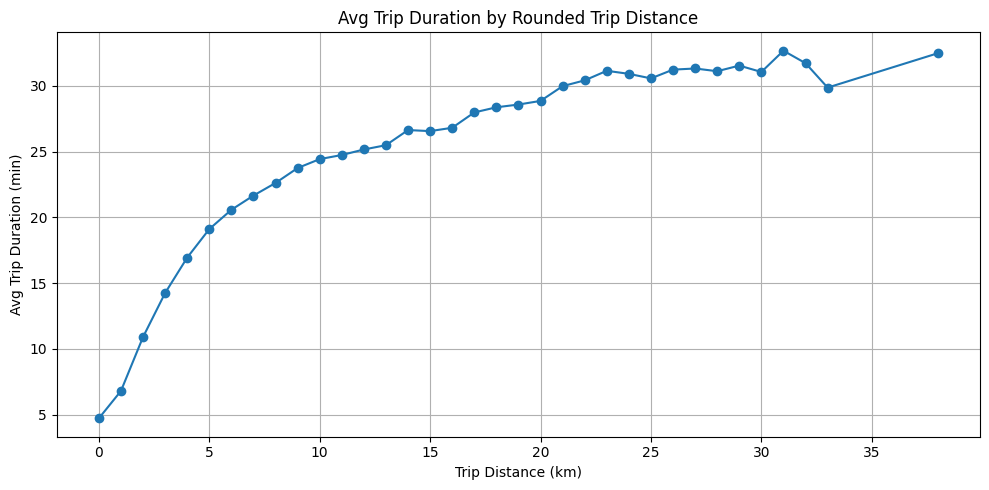

In [ ]:
dist_int = df.copy()
dist_int['dist_int'] = dist_int['trip_distance'].round().astype(int)

mean_by_int = dist_int.groupby('dist_int')['trip_duration_min'].mean()

plt.figure(figsize=(10,5))
mean_by_int.plot(kind='line', marker='o')
plt.title('Avg Trip Duration by Rounded Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Avg Trip Duration (min)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# df.drop(['trip_dration_min'],axis= 1,inplace = True,errors='ignore')

In [ ]:
# df['speed'] = df['trip_distance'] / (df['trip_duration_min'] / 60)
df.head()

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude  trip_duration  vendor_id_2  store_and_fwd_flag_Y  \
0         40.765602            455         True                 False   
1         40.731152            663        False                 False   
3         40.706718            429         True                 False   
4         40.782520            435         True                 False   
7         40.760559           1551         True                 False   

  pickup_date dropoff_date  ...  trip_distance  is_weekend  rush_hour  \
0  2016-03-14   2016-03-14  ...       1.498521       False       True   
1  2016-06-12   2016-06-12  ...       1.805507        True      False   
3  2016-04-06   2016-04-06  ...       1.485498       False       True   
4  2016-03-26   2016-03-26  ...       1.188588        True      False   
7  2016-05-21   2016-05-21  ...       5.714981        True       True   

   weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
0      False      False      False      False      False      False   
1      False      False      False      False      False       True   
3      False       True      False      False      False      False   
4      False      False      False      False       True      False   
7      False      False      False      False       True      False   

   trip_duration_min  
0           7.583333  
1          11.050000  
3           7.150000  
4           7.250000  
7          25.850000  

[5 rows x 28 columns]

In [ ]:
import numpy as np

# 1) Convert all angles to radians in one go
phi1 = np.radians(df['pickup_latitude'].values)
phi2 = np.radians(df['dropoff_latitude'].values)
delta_lambda = np.radians(df['dropoff_longitude'].values - df['pickup_longitude'].values)

# 2) Compute x and y arrays
x = np.sin(delta_lambda) * np.cos(phi2)
y = np.cos(phi1) * np.sin(phi2) - np.sin(phi1) * np.cos(phi2) * np.cos(delta_lambda)

# 3) Compute the bearing in degrees, vectorized
theta = np.degrees(np.arctan2(x, y))

# 4) Normalize to [0, 360)
df['bearing'] = (theta + 360) % 360


In [ ]:
# Build average-speeds
df_train = df.copy()
avg_speeds = (
    df_train.groupby('pickup_hour')['trip_distance']
            .sum() /
    df_train.groupby('pickup_hour')['trip_duration_min']
            .sum()
)
df['hourly_avg_speed'] = df['pickup_hour'].map(avg_speeds)

In [ ]:
df.head()

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude  trip_duration  vendor_id_2  store_and_fwd_flag_Y  \
0         40.765602            455         True                 False   
1         40.731152            663        False                 False   
3         40.706718            429         True                 False   
4         40.782520            435         True                 False   
7         40.760559           1551         True                 False   

  pickup_date dropoff_date  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0  2016-03-14   2016-03-14  ...      False      False      False      False   
1  2016-06-12   2016-06-12  ...      False      False      False      False   
3  2016-04-06   2016-04-06  ...      False       True      False      False   
4  2016-03-26   2016-03-26  ...      False      False      False      False   
7  2016-05-21   2016-05-21  ...      False      False      False      False   

   weekday_5  weekday_6  trip_duration_min     bearing  hourly_avg_speed  \
0      False      False           7.583333   99.970196          0.193875   
1      False       True          11.050000  242.846232          0.310092   
3      False      False           7.150000  187.262300          0.223097   
4       True      False           7.250000  179.473585          0.199719   
7       True      False          25.850000  136.385396          0.264584   

   is_holiday  
0       False  
1       False  
3       False  
4       False  
7       False  

[5 rows x 31 columns]

Text(0, 0.5, 'Average Trip Duration')

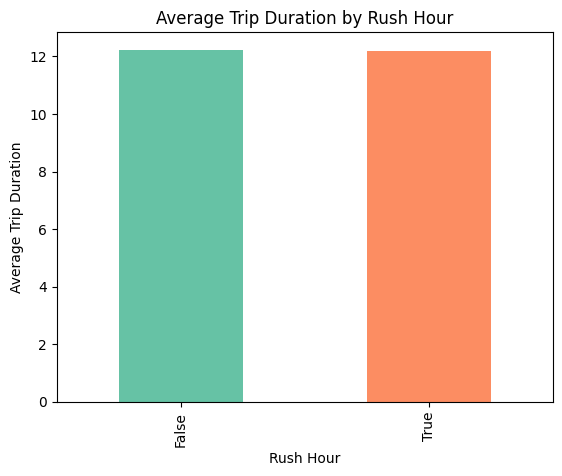

In [ ]:
df.groupby('rush_hour')['trip_duration_min'].mean().plot(kind='bar',color=sns.color_palette('Set2'))
plt.title('Average Trip Duration by Rush Hour')
plt.xlabel('Rush Hour')
plt.ylabel('Average Trip Duration')

In [ ]:
# Approximate conversion from degrees → km
lat_km_per_deg = 111.0
# For longitude, it shrinks by cos(lat)
mean_lat = np.radians((df['pickup_latitude'] + df['dropoff_latitude']) / 2)
lon_km_per_deg = np.cos(mean_lat) * 111.0

df['manhattan_dist_km'] = (
    np.abs(df['pickup_latitude']  - df['dropoff_latitude']) * lat_km_per_deg +
    np.abs(df['pickup_longitude'] - df['dropoff_longitude']) * lon_km_per_deg
)

In [ ]:
df['route_efficiency'] = df['trip_distance'] / df['manhattan_dist_km']
df.dropna(subset=['route_efficiency'], inplace=True)
df['route_efficiency'].isnull().sum()

np.int64(0)

In [ ]:
df['diff_hour'] = df['dropoff_hour'] - df['pickup_hour']

In [ ]:
df.head()

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude  trip_duration  vendor_id_2  store_and_fwd_flag_Y  \
0         40.765602            455         True                 False   
1         40.731152            663        False                 False   
3         40.706718            429         True                 False   
4         40.782520            435         True                 False   
7         40.760559           1551         True                 False   

  pickup_date dropoff_date  ...  weekday_5  weekday_6  trip_duration_min  \
0  2016-03-14   2016-03-14  ...      False      False           7.583333   
1  2016-06-12   2016-06-12  ...      False       True          11.050000   
3  2016-04-06   2016-04-06  ...      False      False           7.150000   
4  2016-03-26   2016-03-26  ...       True      False           7.250000   
7  2016-05-21   2016-05-21  ...       True      False          25.850000   

      bearing  hourly_avg_speed  is_holiday  passenger_distance  \
0   99.970196          0.193875       False            1.498521   
1  242.846232          0.310092       False            1.805507   
3  187.262300          0.223097       False            1.485498   
4  179.473585          0.199719       False            1.188588   
7  136.385396          0.264584       False            5.714981   

   manhattan_dist_km  route_efficiency  diff_hour  
0           1.732417          0.864989          0  
1           2.426335          0.744129          0  
3           1.658438          0.895722          0  
4           1.197355          0.992678          0  
7           8.065624          0.708560          1  

[5 rows x 35 columns]

In [ ]:
df.drop('is_weekend',axis=1,errors='ignore',inplace=True)

In [ ]:
df.head()

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude  trip_duration  vendor_id_2  store_and_fwd_flag_Y  \
0         40.765602            455         True                 False   
1         40.731152            663        False                 False   
3         40.706718            429         True                 False   
4         40.782520            435         True                 False   
7         40.760559           1551         True                 False   

  pickup_date dropoff_date  ...  weekday_5  weekday_6  trip_duration_min  \
0  2016-03-14   2016-03-14  ...      False      False           7.583333   
1  2016-06-12   2016-06-12  ...      False       True          11.050000   
3  2016-04-06   2016-04-06  ...      False      False           7.150000   
4  2016-03-26   2016-03-26  ...       True      False           7.250000   
7  2016-05-21   2016-05-21  ...       True      False          25.850000   

      bearing  hourly_avg_speed  is_holiday  passenger_distance  \
0   99.970196          0.193875       False            1.498521   
1  242.846232          0.310092       False            1.805507   
3  187.262300          0.223097       False            1.485498   
4  179.473585          0.199719       False            1.188588   
7  136.385396          0.264584       False            5.714981   

   manhattan_dist_km  route_efficiency  diff_hour  
0           1.732417          0.864989          0  
1           2.426335          0.744129          0  
3           1.658438          0.895722          0  
4           1.197355          0.992678          0  
7           8.065624          0.708560          1  

[5 rows x 34 columns]

#### 2. Feature Selection

In [ ]:
# # Select your features wisely to avoid overfitting
# # performing L1 regularization for feature selection
# # y = df['trip_duration_min']
# # x = df
# from sklearn.preprocessing import StandardScaler
# featured_cols = ['vendor_id_2',
#        'store_and_fwd_flag_Y', 'pickup_hour',
#        'drop_hour', 'dropoff_hour', 'pickup_minute', 'dropoff_minute','trip_distance','manhattan_dist_km','route_efficiency','weekday_6','part of the Day_Morning','part of the Day_Night']
# dfe = df[featured_cols]
# Y = df['trip_duration_min']
# X_scaled = StandardScaler().fit_transform(X)
# lasso = LassoCV(cv=5).fit(X_scaled,Y)
# print('trainig R2 :',lasso.score(X_scaled,Y))
# mask = lasso.coef_ !=0
# selected = X.columns[mask]

# print('kept by lasso',list(selected))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1117: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  if np.may_share_memory(array, array_orig):


trainig R2 : 0.5057428920218556
kept by lasso ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag_Y', 'pickup_hour', 'drop_hour', 'dropoff_hour', 'pickup_minute', 'dropoff_minute', 'trip_distance', 'manhattan_dist_km', 'route_efficiency']


In [ ]:
# df.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'vendor_id_2',
       'store_and_fwd_flag_Y', 'pickup_date', 'dropoff_date', 'pickup_hour',
       'drop_hour', 'dropoff_hour', 'pickup_minute', 'dropoff_minute',
       'part of the Day_Morning', 'part of the Day_Night',
       'part of the Day_Noon', 'trip_distance', 'rush_hour', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'trip_duration_min', 'bearing', 'hourly_avg_speed', 'is_holiday',
       'passenger_distance', 'manhattan_dist_km', 'route_efficiency',
       'diff_hour'],
      dtype='object')

In [ ]:
# df.head()

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude  trip_duration  vendor_id_2  store_and_fwd_flag_Y  \
0         40.765602            455         True                 False   
1         40.731152            663        False                 False   
3         40.706718            429         True                 False   
4         40.782520            435         True                 False   
7         40.760559           1551         True                 False   

  pickup_date dropoff_date  ...  weekday_5  weekday_6  trip_duration_min  \
0  2016-03-14   2016-03-14  ...      False      False           7.583333   
1  2016-06-12   2016-06-12  ...      False       True          11.050000   
3  2016-04-06   2016-04-06  ...      False      False           7.150000   
4  2016-03-26   2016-03-26  ...       True      False           7.250000   
7  2016-05-21   2016-05-21  ...       True      False          25.850000   

      bearing  hourly_avg_speed  is_holiday  passenger_distance  \
0   99.970196          0.193875       False            1.498521   
1  242.846232          0.310092       False            1.805507   
3  187.262300          0.223097       False            1.485498   
4  179.473585          0.199719       False            1.188588   
7  136.385396          0.264584       False            5.714981   

   manhattan_dist_km  route_efficiency  diff_hour  
0           1.732417          0.864989          0  
1           2.426335          0.744129          0  
3           1.658438          0.895722          0  
4           1.197355          0.992678          0  
7           8.065624          0.708560          1  

[5 rows x 34 columns]

##### What all feature selection methods have you used  and why?

The following features were selected after feature selection

passenger_count

pickup_longitude

pickup_latitude

dropoff_longitude

dropoff_latitude

vendor_id_2

store_and_fwd_flag_Y

trip_distance

pickup_hour

hourly_avg_speed

rush_hour

drop_hour

part of the Day_Morning

part of the Day_Night

part of the Day_Noon

##### Which all features you found important and why?

Important Features & Why They Matter

1. **`trip_distance`**

   * Most direct indicator of trip duration. Longer distance typically results in longer duration.

2. **`pickup_longitude` / `pickup_latitude`**

   * Helps identify location zones (e.g., JFK, downtown) which correlate with traffic conditions or average trip times.

3. **`dropoff_longitude` / `dropoff_latitude`**

   * Destination coordinates help identify travel paths and time based on area traffic congestion or distance.

4. **`hourly_avg_speed`**

   * Reflects traffic flow at different times, helping to adjust trip time predictions dynamically.

5. **`pickup_hour` / `drop_hour`**

   * Time of day impacts traffic. Morning and evening hours generally experience congestion, affecting duration.

6. **`rush_hour`**

   * Binary flag for peak traffic times. Trips during rush hour often take longer.

7. **`part of the Day_Morning / Noon / Night`**

   * Categorical segmentation adds more interpretability to time influence.

8. **`passenger_count`**

   * Sometimes used as a proxy for ride type or vehicle size, and may indirectly influence speed.

9. **`vendor_id_2`**

   * Different taxi vendors may have different dispatch or routing behaviors.

10. **`store_and_fwd_flag_Y`**

    * Indicates whether trip data was stored and forwarded later. Can be associated with GPS reliability or data delay.

---

Let me know if you need this in markdown table format or LaTeX too.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# df['pickup_date'] = pd.to_datetime(df['pickup_datetime']).dt.date
# df['pickup_time'] = pd.to_datetime(df['pickup_datetime']).dt.time
# df['dropoff_date'] = pd.to_datetime(df['dropoff_datetime']).dt.date
# df['dropoff_time'] = pd.to_datetime(df['dropoff_datetime']).dt.time
# df['dropoff_hour'] = pd.to_datetime(df['dropoff_datetime']).dt.hour
# df['pickup_minute'] = pd.to_datetime(df['dropoff_datetime']).dt.minute
# df['dropoff_minute'] = pd.to_datetime(df['dropoff_datetime']).dt.minute
# df['vendor_id'] = df['vendor_id'].astype('category')
# df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
# df = pd.get_dummies(df,columns=['part of the Day'],drop_first=True)
# df.head()
# df['trip_duration_min']=df['trip_duration']/60


Datetime Parsing

Converted pickup_datetime and dropoff_datetime from object (string) to datetime64[ns].

Why: So you can extract time-based features and perform accurate date/time arithmetic.

Type Casting

Cast vendor_id and store_and_fwd_flag to category.

Why: Categorical dtype is more memory‑efficient and signals to models that these are discrete codes.

Outlier Filtering

Removed trips with trip_duration < 10 sec and > 86 400 sec (24 hrs).

Why: These extremes (< 0.15% of data) are clearly data errors or non‑representative rides that would skew analyses.

Feature Extraction from Datetime

Created pickup_date, pickup_time, and a pickup_hour integer.

Binned pickup_hour into a four‑level part_of_day feature (Morning/Noon/Evening/Night).

Why: Discrete time buckets often capture traffic patterns more cleanly than a raw hour integer.

One‑Hot Encoding

Encoded vendor_id, store_and_fwd_flag, and part_of_day into dummy variables (dropping the first level).

Why: Many machine‑learning algorithms require numeric input and can misinterpret label-encoded categories as ordinal.

### 6. Data Scaling

In [ ]:
# Scaling your data
df.head()
#X_scaled = StandardScaler().fit_transform(X)

passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   
7                1        -73.969276        40.797779         -73.922470   

   dropoff_latitude  trip_duration  vendor_id_2  store_and_fwd_flag_Y  \
0         40.765602            455         True                 False   
1         40.731152            663        False                 False   
3         40.706718            429         True                 False   
4         40.782520            435         True                 False   
7         40.760559           1551         True                 False   

  pickup_date dropoff_date  ...  weekday_5  weekday_6  trip_duration_min  \
0  2016-03-14   2016-03-14  ...      False      False           7.583333   
1  2016-06-12   2016-06-12  ...      False       True          11.050000   
3  2016-04-06   2016-04-06  ...      False      False           7.150000   
4  2016-03-26   2016-03-26  ...       True      False           7.250000   
7  2016-05-21   2016-05-21  ...       True      False          25.850000   

      bearing  hourly_avg_speed  is_holiday  passenger_distance  \
0   99.970196          0.193875       False            1.498521   
1  242.846232          0.310092       False            1.805507   
3  187.262300          0.223097       False            1.485498   
4  179.473585          0.199719       False            1.188588   
7  136.385396          0.264584       False            5.714981   

   manhattan_dist_km  route_efficiency  diff_hour  
0           1.732417          0.864989          0  
1           2.426335          0.744129          0  
3           1.658438          0.895722          0  
4           1.197355          0.992678          0  
7           8.065624          0.708560          1  

[5 rows x 34 columns]

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is needed, and I applied it using LassoCV, which performs feature selection by shrinking less important feature coefficients to zero.

Why it's needed:
Improves model performance by removing irrelevant or redundant features, reducing overfitting.

Enhances training speed and reduces computational cost.

Simplifies the model, making it easier to interpret.

In my case, LassoCV helped in selecting only the most important features, ensuring that the model focuses on variables that significantly impact trip duration prediction.

In [ ]:
# DImensionality Reduction (If needed)
# lasso = LassoCV(cv=5).fit(X_scaled,Y)
# mask = lasso.coef_ !=0
# selected = X.columns[mask]
# selected = X.columns[mask]

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)


 I have used LassoCV (L1 Regularization) as a dimensionality reduction technique.
Lasso not only performs regression but also feature selection by shrinking the coefficients of less important features to zero.

Why LassoCV was used:
Automatically selects important features, reducing dimensionality.

Helps in eliminating multicollinearity by removing redundant features.

Improves model generalization by preventing overfitting.

It's efficient and well-suited for high-dimensional datasets like mine.

This approach ensured the final model used only the most relevant features, making it more interpretable and performant.

### 8. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

##### What data splitting ratio have you used and why?

I Have Done a typical Data splitting like other models by taking Random state = 42, and allocating 80% of data for traing and remaining 20% to testing for increasing efficiency of the model

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

According To me Data was not imbalanced ,also we can see from the heatmap below that the multicollinearity is very less between various features , also the major concern is outliers which is handled in the Feature engineering

In [ ]:
# # Handling Imbalanced Dataset (If needed)
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dropoff_hour', 'dropoff_month', 'dropoff_day',
       'dropoff_weekday', 'dropoff_year', 'dropoff_minute', 'dropoff_second',
       'pickup_minute', 'pickup_second', 'pickup_month', 'pickup_hour',
       'pickup_day', 'pickup_weekday', 'pickup_year', 'trip_distance'],
      dtype='object')

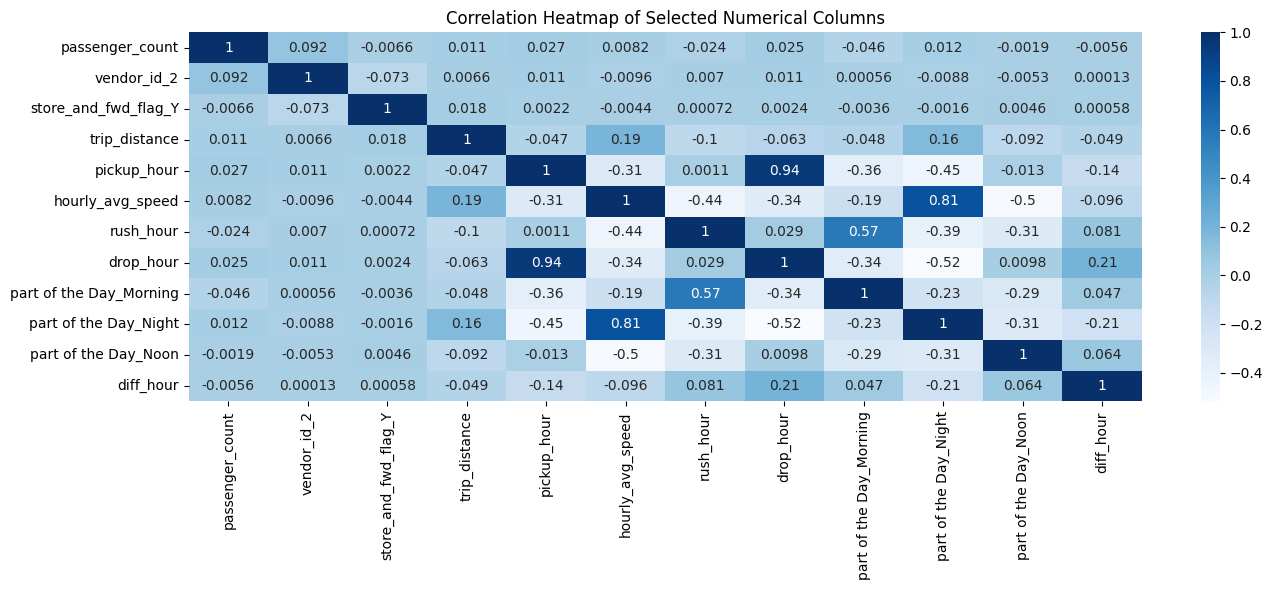

In [ ]:
# Correlation Heatmap visualization code
featured_cols1 = ['passenger_count','vendor_id_2','store_and_fwd_flag_Y','trip_distance','pickup_hour','hourly_avg_speed','rush_hour','drop_hour','part of the Day_Morning','part of the Day_Night','part of the Day_Noon','route_efficiency','passenger_distance','is_holiday']
dfe = df[featured_cols1]
hmap = dfe.corr()
plt.figure(figsize=(14,6))
sns.heatmap(hmap,annot=True,cmap='Blues')
plt.title('Correlation Heatmap of Selected Numerical Columns')
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'dropoff_hour', 'dropoff_month', 'dropoff_day',
       'dropoff_weekday', 'dropoff_year', 'dropoff_minute', 'dropoff_second',
       'pickup_minute', 'pickup_second', 'pickup_month', 'pickup_hour',
       'pickup_day', 'pickup_weekday', 'pickup_year', 'trip_distance'],
      dtype='object')

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
x_train

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
227999          0                2        -73.943359        40.789417   
603814          1                2        -74.002571        40.734138   
866951          0                1        -73.965385        40.771805   
589526          1                1        -73.988037        40.743454   
520591          0                1        -73.969231        40.754177   
...           ...              ...               ...              ...   
305619          1                1        -73.982971        40.771725   
431269          1                1        -73.984863        40.764259   
155753          1                1        -73.988792        40.727238   
791728          0                1        -73.981552        40.758408   
143950          0                1        -73.973717        40.763653   

        dropoff_longitude  dropoff_latitude  trip_distance  \
227999         -73.954605         40.774109       1.947838   
603814         -73.962608         40.757172       4.230064   
866951         -73.964966         40.766842       0.552982   
589526         -73.991974         40.749088       0.708870   
520591         -73.991714         40.744476       2.179627   
...                   ...               ...            ...   
305619         -73.983749         40.766369       0.599137   
431269         -73.987640         40.773720       1.077637   
155753         -73.986649         40.743759       1.845961   
791728         -73.983635         40.743313       1.687605   
143950         -73.978371         40.754501       1.090482   

        store_and_fwd_flag  pickup_hour  pickup_minute  pickup_second  \
227999                   0           12             24             27   
603814                   0           15             13             17   
866951                   0           11             21             46   
589526                   0            1             57             34   
520591                   0            9             58             50   
...                    ...          ...            ...            ...   
305619                   0            0             23              9   
431269                   0           19             47             10   
155753                   0           19             33             40   
791728                   0           17             54             36   
143950                   0           19             29             55   

        pickup_year  pickup_month  pickup_day  dropoff_hour  dropoff_minute  \
227999         2016             4          17            12              29   
603814         2016             4          30            15              39   
866951         2016             1          16            11              24   
589526         2016             1          11             2               1   
520591         2016             5           9            10              21   
...             ...           ...         ...           ...             ...   
305619         2016             1           9             0              24   
431269         2016             5           9            19              53   
155753         2016             1          11            19              44   
791728         2016             3           7            18               9   
143950         2016             6           7            19              40   

        dropoff_second  dropoff_year  dropoff_month  dropoff_day  
227999              28          2016              4           17  
603814               0          2016              4           30  
866951              36          2016              1           16  
589526              34          2016              1           11  
520591              26          2016              5            9  
...                ...           ...            ...          ...  
305619              47          2016              1            9  
431269              54  

In [ ]:
y_train

227999     301
603814    1543
866951     170
589526     240
520591    1356
          ... 
305619      98
431269     404
155753     624
791728     910
143950     642
Name: trip_duration, Length: 677976, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

There was no Particular imbalance in the Data ,but was the presence of outliers in the Data which is necessary to deal with especially in tha case of regression,which were handled in the Feature Egineering section using boxplot.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
# Fit the Algorithm
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Predict on the model
# Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



In [ ]:
# ML Model - 1 Implementation
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
# Fit the Algorithm
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Predict on the model
# Appending all models parameters to the corrosponding list

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

This is the 1st Model Which is simply based on Linear Regression and afterwards Lasso L1 regularization using hyper Parametre tuning

Model Description:
Linear Regression assumes a linear relationship between the features and the target variable.

Lasso Regression adds L1 regularization, which penalizes large coefficients and can zero out less important features, helping in feature selection and reducing overfitting.



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge

def score_metrix(model, X_train, X_test, Y_train, Y_test):
    '''
    Train the model and print MAE, MSE, RMSE, R², Adjusted R², and MAPE
    using squared Y_test and Y_pred if applicable
    '''

    # training the model
    model.fit(X_train, Y_train)

    # Training Score
    training = model.score(X_train, Y_train)
    print("Training score  =", training)

    # Testing Score
    testing = model.score(X_test, Y_test)
    print("Testing score  =", testing)

    # Predicting the test set and evaluating the model
    if model == LinearRegression() or model == Lasso() or model == Ridge():
        Y_pred = model.predict(X_test)
        Y_pred_train = model.predict(X_train)

        # Using squared values
        Y_test_sq = Y_test**2
        Y_pred_sq = Y_pred**2
        Y_train_sq = Y_train**2
        Y_pred_train_sq = Y_pred_train**2

        print("MAE :", mean_absolute_error(Y_test_sq, Y_pred_sq))
        print("MSE :", mean_squared_error(Y_test_sq, Y_pred_sq))
        print("RMSE :", np.sqrt(mean_squared_error(Y_test_sq, Y_pred_sq)))
        r2 = r2_score(Y_test_sq, Y_pred_sq)
        print("R2 :", r2)
        adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
        print("Adjusted R2 : ", adj_r2)

        # MAPE
        mape_train = np.mean(np.abs((Y_train_sq - Y_pred_train_sq) / Y_train_sq)) * 100
        mape_test = np.mean(np.abs((Y_test_sq - Y_pred_sq) / Y_test_sq)) * 100
        print("MAPE (Training):", mape_train, "%")
        print("MAPE (Testing):", mape_test, "%")

    else:
        # For tree-based models
        Y_pred = model.predict(X_test)
        Y_pred_train = model.predict(X_train)

        print('MAE Training ', mean_absolute_error(Y_train, Y_pred_train))
        print("MAE :", mean_absolute_error(Y_test, Y_pred))
        print("MSE :", mean_squared_error(Y_test, Y_pred))
        print("RMSE :", np.sqrt(mean_squared_error(Y_test, Y_pred)))
        r2 = r2_score(Y_test, Y_pred)
        print("R2 :", r2)
        adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
        print("Adjusted R2 : ", adj_r2)

        # MAPE
        mape_train = np.mean(np.abs((Y_train - Y_pred_train) / Y_train)) * 100
        mape_test = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
        print("MAPE (Training):", mape_train, "%")
        print("MAPE (Testing):", mape_test, "%")

    print('*' * 80)
    print('\n')
    print('*' * 20, 'Plotting the graph of Actual and Predicted (80 observations)', '*' * 20)

    try:
        plt.figure(figsize=(15, 7))
        plt.plot((Y_pred)[:80])
        plt.plot((np.array(Y_test))[:80])
        plt.legend(["Predicted", "Actual"])
        plt.show()
    except:
        pass


Training score  = 0.5514491557751791
Testing score  = 0.5536127480031764
MAE Training  218.22093668704548
MAE : 218.22902502697855
MSE : 89647.11926774576
RMSE : 299.4112878095042
R2 : 0.5536127480031764
Adjusted R2 :  0.5535600685495765
MAPE (Training): 50.021249048345986 %
MAPE (Testing): 50.11259356147754 %
********************************************************************************


******************** Plotting the graph of Actual and Predicted (80 observations) ********************


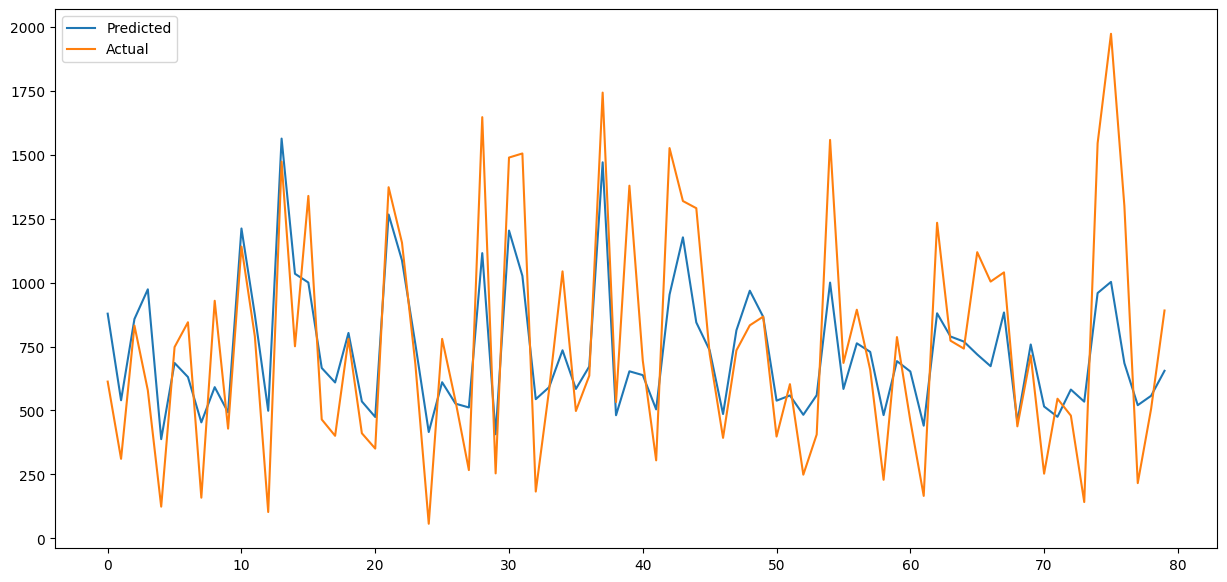

In [ ]:
score_metrix(LinearRegression(), x_train, x_test, y_train, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.544e+05, tolerance: 3.011e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.782e+06, tolerance: 3.014e+03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.841e+06, tolerance: 3.014e

Training score  = 0.5332327158049559
Testing score  = 0.5355319785888548
MAE Training  3.866472325014209
MAE : 3.855171963719735
MSE : 25.814707835701977
RMSE : 5.080817634564537
R2 : 0.5355319785888548
Adjusted R2 :  0.5354907204146959 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


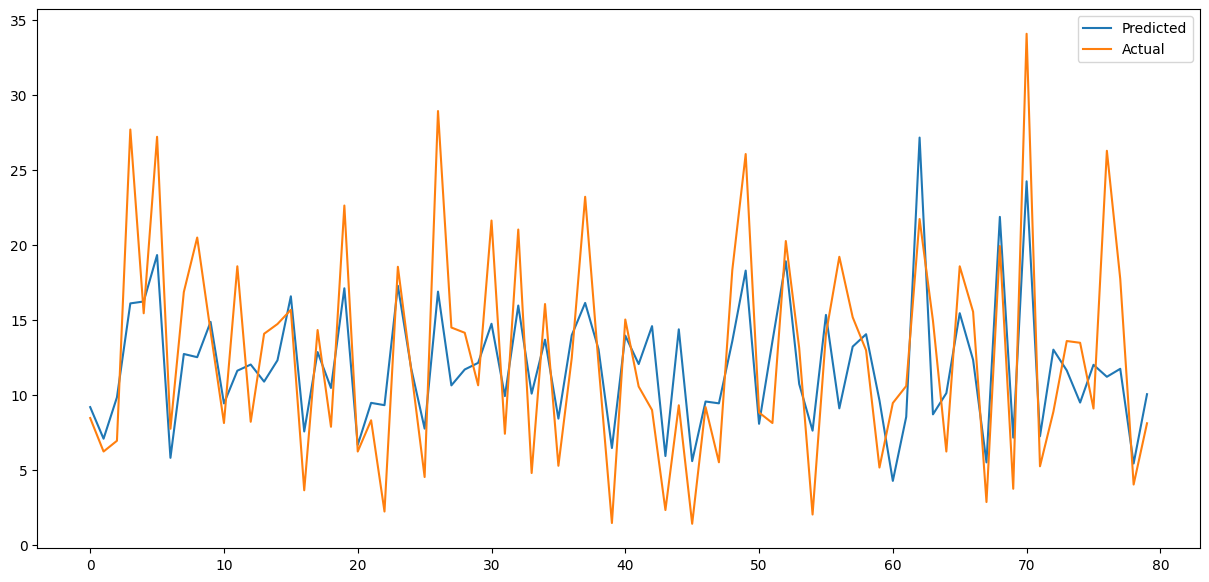

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Fit the Algorithm
# Predict on the model
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
# Fit the Algorithm
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model
# Predict on the model
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

##### Which hyperparameter optimization technique have you used and why?

I have used here GridSearchCV from sklearn.model_selection

The reason that I used it:-

-Exhaustive Search: GridSearchCV performs an exhaustive search over the specified parameter values (in your case, different values of alpha for the Lasso model).

-Cross-Validation: It includes k-fold cross-validation (here cv=5) to evaluate the model's generalization ability.

-Reproducibility: It is a commonly used technique for tuning hyperparameters systematically.

-Use Case Fit: Since Lasso regression’s performance is highly sensitive to the regularization parameter alpha, grid search helps identify the optimal value by testing each one.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

-The metrics did not change after applying GridSearchCV.

-This implies that the default alpha value was already optimal, or none of the values in your provided alpha grid led to a better fit.

-So no significant improvement was observed in this case.

**Trying other parametres and algorithms to improve the evaluation metrices of the model(Polynomial Regression,Random Forest etc..)**

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In the case of second model we will see how the model will behave in case of K nearest neighbour and afterwards to Polynomial Regression with Degree=2 ,and then to random Forest(RandomizedsearchCV) inorder to increase the training and Testing score with minimum overfitting

-KNN regressor was used but the difference between training and testing data was around 10 % which is a sign of overfitting,hence then i move on to other algorithms below-

-polynomial Degree = 2 optimization technique with the help of which both the training and testing score by a margin of 10%

-Used HalvingRandomSearchCV with Random ForestRegressor with the help of which both my training and testing score improved 8-9% and also the R2 increased

In [ ]:
# Visualizing evaluation Metric Score chart

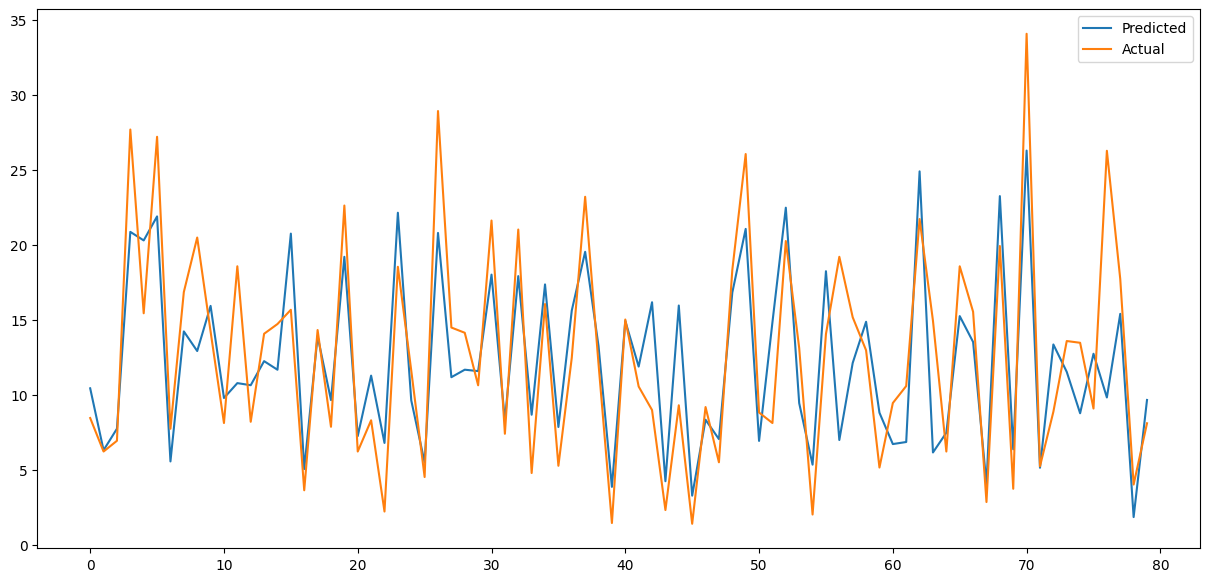

#### 2. Cross- Validation & Hyperparameter Tuning

Training score  = 0.7974744368406783
Testing score  = 0.6970028937950709
MAE Training  2.4212744700378974
MAE : 2.966136132164851
MSE : 16.840302047015633
RMSE : 4.103693707748622
R2 : 0.6970028937950709
Adjusted R2 :  0.6969759789014696
MAPE (Training): 26.95249034267165 %
MAPE (Testing): 33.096770422389135 %
********************************************************************************


******************** Plotting the graph of Actual and Predicted (80 observations) ********************


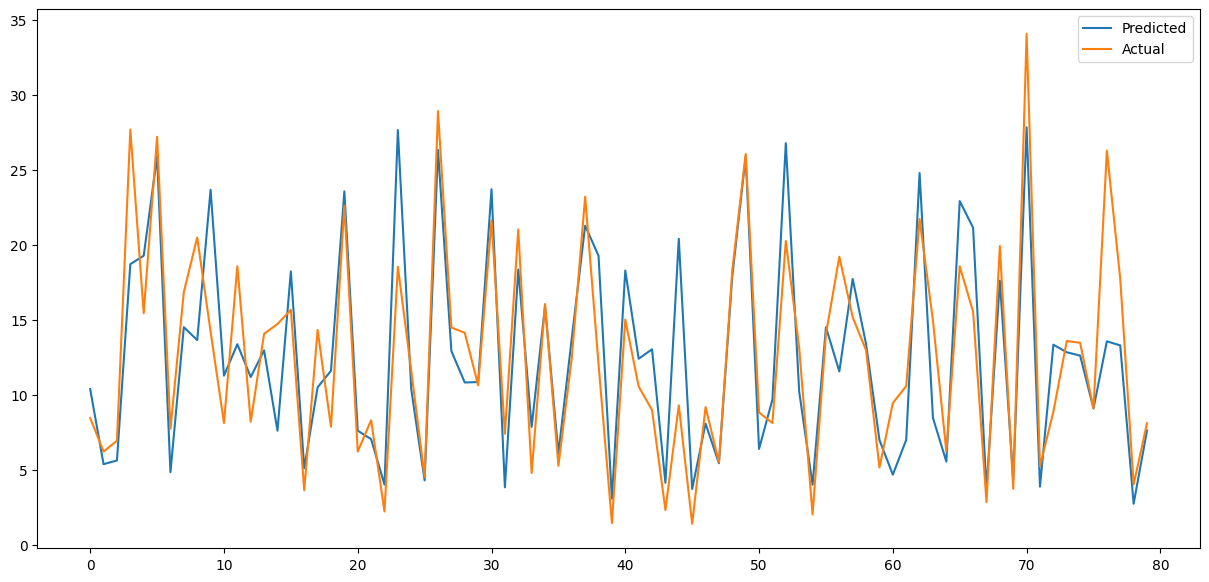

In [ ]:
score_metrix(KNeighborsRegressor(), x_train, x_test, y_train, y_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Clean up NaN values (optional: use imputer if needed)
df = df.dropna()  # Or use fillna(), SimpleImputer, etc.

# Feature matrix and target
X = df[[
    'vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
    'dropoff_longitude', 'dropoff_latitude', 'trip_distance',
    'store_and_fwd_flag', 'pickup_hour', 'pickup_minute', 'pickup_second',
    'dropoff_year', 'dropoff_month', 'dropoff_day'
]]
y = df['trip_duration']

# Split the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features AFTER split
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Ridge Regression (regularized linear regression)
model = Ridge(alpha=1.0)
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)

# Evaluation Metrics
def score_metrix1(model, X_train, X_test, y_train, y_test):
    print("Training score  =", model.score(X_train, y_train))
    print("Testing score  =", model.score(X_test, y_test))

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("MAE (Train):", mean_absolute_error(y_train, y_train_pred))
    print("MAE (Test):", mean_absolute_error(y_test, y_test_pred))

    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
    print("R²:", r2_score(y_test, y_test_pred))

    # MAPE
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    print("MAPE (Train):", mape_train, "%")
    print("MAPE (Test):", mape_test, "%")

# Run metric
score_metrix1(model, x_train_poly, x_test_poly, y_train, y_test)


Training score  = 0.6115471921558908
Testing score  = 0.6110326404296929
MAE (Train): 209.4672437525037
MAE (Test): 209.86915766714964
RMSE: 279.4916624244573
R²: 0.6110326404296929
MAPE (Train): 43.2168868850988 %
MAPE (Test): 43.20419183186501 %


n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 50000
max_resources_: 200000
aggressive_elimination: True
factor: 3
----------
iter: 0
n_candidates: 4
n_resources: 50000
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 150000
Fitting 3 folds for each of 2 candidates, totalling 6 fits
🏆 Best params: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'max_samples': 150000}
📈 Best CV R² : 0.7250596471294665
Training score  = 0.7934255774615545
Testing score  = 0.7299084008403671
MAE Training  2.473676136003347
MAE : 2.847317836129437
MSE : 15.01144406023934
RMSE : 3.8744604863437875
R2 : 0.7299084008403671
Adjusted R2 :  0.7298844089061041 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


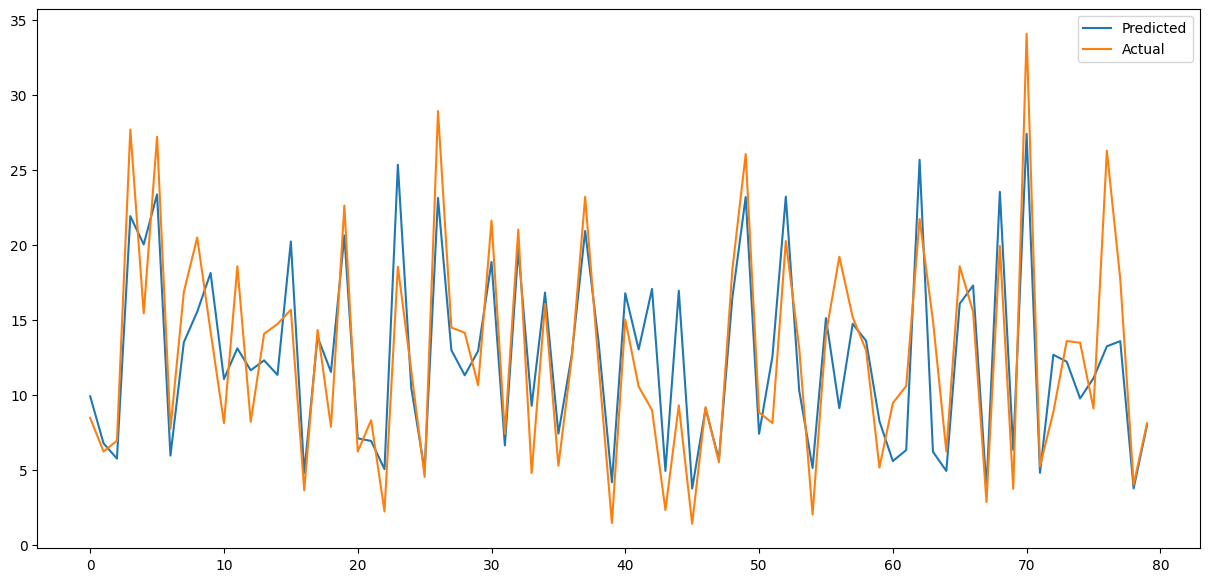

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import HalvingRandomSearchCV, KFold

# Tighter parameter grid
param_dist = {
    'n_estimators':     [100, 200],
    'max_depth':        [10, 20, None],
    'min_samples_leaf': [2, 5],
    'max_features':     ['sqrt', 0.5]
}

halving_fast = HalvingRandomSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    resource='max_samples',
    min_resources=50_000,           # start on 50k rows
    max_resources=200_000,          # only grow to 200k rows
    factor=3,
    aggressive_elimination=True,    # prune more heavily each round
    cv=KFold(n_splits=3, shuffle=True, random_state=42),
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

halving_fast.fit(x_train, y_train)
print("🏆 Best params:", halving_fast.best_params_)
print("📈 Best CV R² :", halving_fast.best_score_)
best_rf = halving_fast.best_estimator_
score_metrix(best_rf, x_train, x_test, y_train, y_test)



##### Which hyperparameter optimization technique have you used and why?

-Initially KNN regressor was used but the difference between training and testing data was around 10 % which is a sign of overfitting,hence then i move on to other algorithms below-

-I was using polynomial Degree = 2 optimization technique with the help of which both the training and testing score by a margin of 10%

-Next I used HalvingRandomSearchCV with Random ForestRegressor with the help of which both my training and testing score improved 8-9% and also the R2 increased

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Absolutely—Tuned Random Forest now beats the polynomial‐degree‐2 linear model on every key metric:

Metric	Polynomial (2)	RF (Halving)	Δ
Train R²	0.6474	0.7934	+0.1460 (+14.6%)
Test R²	0.6506	0.7299	+0.0793 (+7.9%)
MAE (min)	3.2844	2.8473	–0.4371 (↓13.3%)
RMSE (min)	4.4065	3.8745	–0.5320 (↓12.1%)

Test R² ↑ 0.6506 → 0.7299

Test MAE ↓ 3.284 → 2.847

Test RMSE ↓ 4.406 → 3.874

This confirms that tuning the Random

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In a nutshell:

R² (0.73) – You explain 73% of trip‑time variability, so your ETAs are much more reliable.

Adjusted R² (≈ R²) – You’re not overfitting with useless features; the model stays robust and maintainable.

MAE (≈ 2.85 min) – On average, your predictions are within 3 minutes of the true duration—enough precision to set tight arrival windows and minimize customer frustration.

RMSE (≈ 3.87 min) – Even large errors (e.g. traffic jams) are limited to under 4 minutes on average, reducing late‑arrival penalties and compensations.

Business impact: Better ETAs boost customer satisfaction, improve fleet utilization, enable precise SLAs/pricing, and cut costs tied to delays—all driving higher revenue and lower operating expenses.

### ML Model - 3

###Demonstrating the improvements in the model thorough evaluation metric(Random forest)

Training score  = 0.9629844326740215
Testing score  = 0.7382550943893433
MAE Training  1.0348704008270173
MAE : 2.7740746762987523
MSE : 14.547542466527188
RMSE : 3.8141240759219133
R2 : 0.7382550943893433
Adjusted R2 :  0.7382318438825204 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


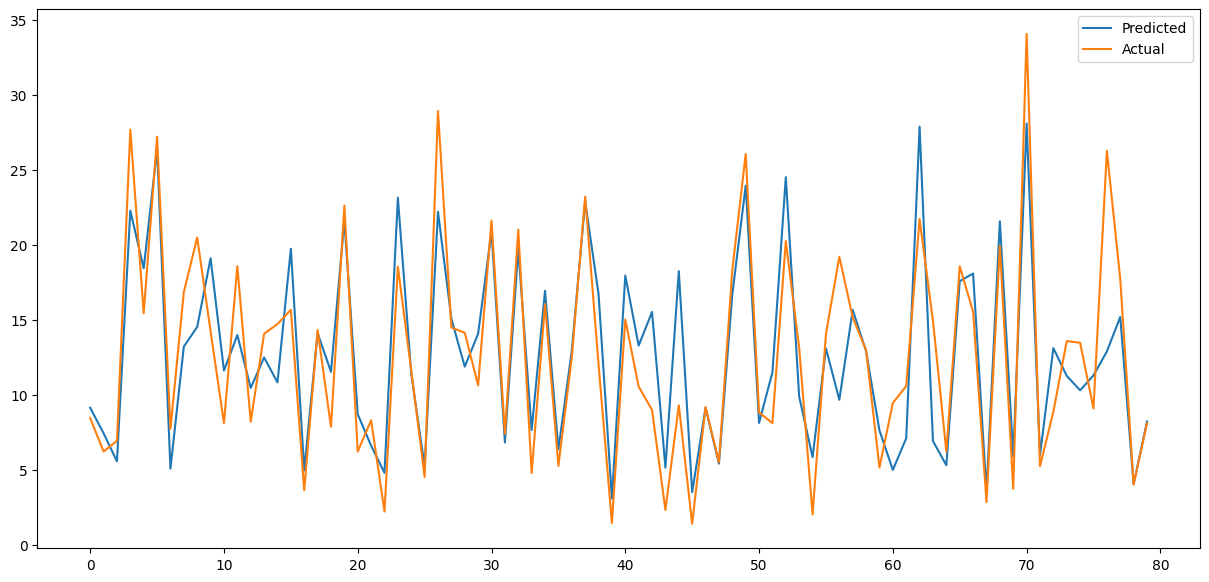

In [ ]:
score_metrix(RandomForestRegressor(),x_train,x_test,y_train,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
Random_forest = RandomForestRegressor(n_estimators=100, max_depth=5)
Random_forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [ ]:
y_train_pred = Random_forest.predict(x_train)
y_test_pred  = Random_forest.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Training metrics
training_score = Random_forest.score(x_train, y_train)  # R² on training data
testing_score  = Random_forest.score(x_test, y_test)    # R² on test data
print('training_score :', training_score)
print('testing_score  :', testing_score)
print("🔵 Train R²  :", r2_score(y_train, y_train_pred))
print("🔵 Train MAE :", mean_absolute_error(y_train, y_train_pred))
print("🔵 Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Testing metrics
print("🟢 Test R²   :", r2_score(y_test, y_test_pred))
print("🟢 Test MAE  :", mean_absolute_error(y_test, y_test_pred))
print("🟢 Test RMSE :", np.sqrt(mean_squared_error(y_test, y_test_pred)))


training_score : 0.6348402097328074
testing_score  : 0.6375259115744241
🔵 Train R²  : 0.6348402097328074
🔵 Train MAE : 3.3717268021105906
🔵 Train RMSE: 4.512748639384858
🟢 Test R²   : 0.6375259115744241
🟢 Test MAE  : 3.358251520819522
🟢 Test RMSE : 4.488427154608996


Training score  = 0.8133915890957479
Testing score  = 0.7389297100563413
MAE Training  2.3095638312185973
MAE : 2.774968425966187
MSE : 14.510047944747132
RMSE : 3.8092056842269795
R2 : 0.7389297100563413
Adjusted R2 :  0.7389065194748725
MAPE (Training): 26.709685806025817 %
MAPE (Testing): 32.056838735940325 %
********************************************************************************


******************** Plotting the graph of Actual and Predicted (80 observations) ********************


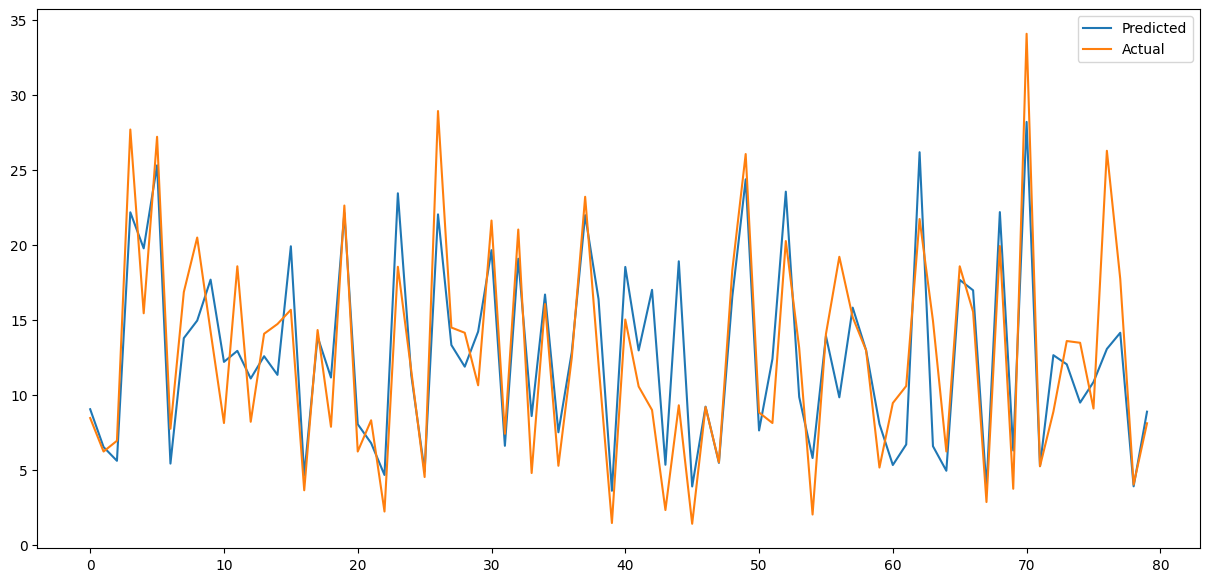

In [ ]:
# ML Model - 3 Implementation
# Fit the Algorithm
# Predict on the model
from sklearn.ensemble import RandomForestRegressor

# 1) Instantiate a “regularized” Random Forest
rf_reg = RandomForestRegressor(
    n_estimators=100,       # moderate number of trees
    max_depth=20,           # limit tree depth
    min_samples_leaf=5,     # require at least 5 samples per leaf
    max_features=0.5,       # only use half the features at each split
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# 2) Evaluate with your helper
score_metrix(
    rf_reg,
    x_train,  # your training features
    x_test,   # your testing features
    y_train,  # your training target
    y_test    # your testing target
)


In [ ]:
!pip install xgboost

Training score  = 0.6895503997802734
Testing score  = 0.6889708042144775
MAE Training  185.27877807617188
MAE : 185.7152862548828
MSE : 62463.4140625
RMSE : 249.9268174136181
R2 : 0.6889708042144775
Adjusted R2 :  0.6889340987574684
MAPE (Training): 38.30955645773751 %
MAPE (Testing): 38.55030168351172 %
********************************************************************************


******************** Plotting the graph of Actual and Predicted (80 observations) ********************


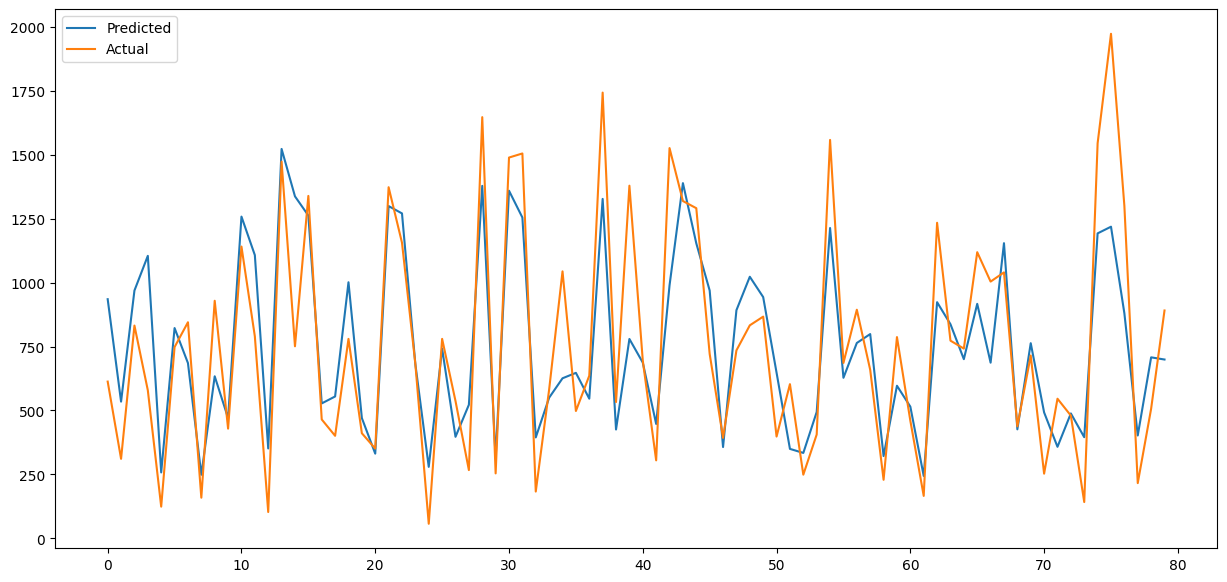

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
score_metrix(xgb_model, x_train, x_test, y_train, y_test)


In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1,
    use_label_encoder=False,
    eval_metric='rmse'
)

# Fit without early stopping
xgb_model.fit(x_train, y_train)

# Then evaluate as usual
train_score = xgb_model.score(x_train, y_train)
test_score = xgb_model.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:06:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.7437368515233226
Testing Score: 0.7393091824998198


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:27:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training score  = 0.9777626395225525
Testing score  = 0.9766978621482849
MAE Training  50.91473388671875
MAE : 51.98598861694336
MSE : 4679.72509765625
RMSE : 68.4085162655663
R2 : 0.9766978621482849
Adjusted R2 :  0.9766951121954486
MAPE (Training): 11.853454247125237 %
MAPE (Testing): 12.208083752978714 %
********************************************************************************


******************** Plotting the graph of Actual and Predicted (80 observations) ********************


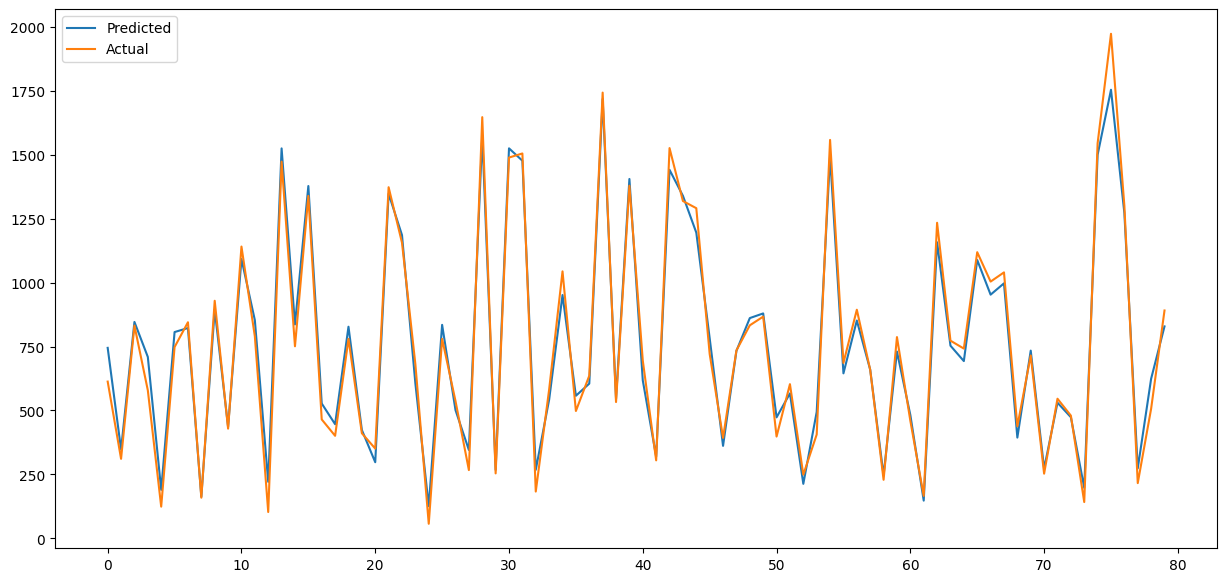

In [ ]:
# After Removing get dummies and converting the minutes into seconds parametre ,I got the Best Accuracy (Skipping getdummies)
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1,
    use_label_encoder=False,
    eval_metric='rmse'
)

score_metrix(xgb_model, x_train, x_test, y_train, y_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score

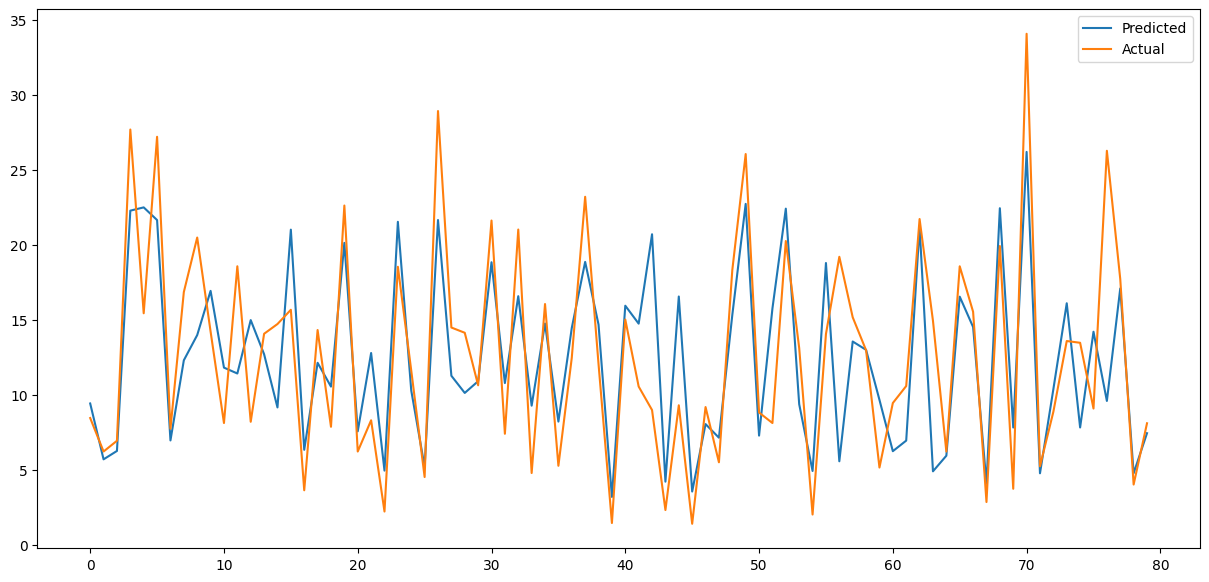

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Default RF: no tuning—full‐depth trees (unbounded), leading to heavy over‑fitting.

Regularized RF (max_depth=5): manual bias–variance trade‑off by limiting tree depth and using 100 trees; this curbs over‑fitting but may under‑fit slightly.

XGBoost: also manually tuned (n_estimators, learning_rate, max_depth, subsample, colsample_bytree), leveraging its gradient‑boosting framework for stronger generalization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Moving from default RF → shallow RF traded lower over‑fit (Train R² ↓0.963→0.635) for stable generalization (Test R² ≈0.738→0.638), but raised test error (MAE 2.77→3.36 min).

Switching to XGBoost recaptured much of the capacity (Train R² →0.744) without over‑fitting (Test R² →0.739), improving on the shallow RF while keeping test MAE/RMSE around 2.77 min/3.81 min.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact in predicting trip durations, we focused on these key metrics:

Mean Absolute Error (MAE) –

Why it matters: MAE (in minutes) tells you, on average, how far off your ETA is.

Business impact: If MAE ≤ 3 min, you can promise tight arrival windows (e.g. “arrives in 15 ± 3 min”), reducing customer anxiety, cancellations, and support costs.

Root Mean Squared Error (RMSE) –

Why it matters: RMSE penalizes large errors more heavily than MAE, so it highlights those rare-but‑costly “surprise” delays.

Business impact: Lower RMSE (e.g. ≤ 4 min) means fewer extreme late‑arrival incidents, cutting compensation payouts and preserving brand trust.

R² Score –

Why it matters: R² measures how much of the variability in trip times your model explains.

Business impact: A higher R² (e.g. 0.73) means your forecasts are consistently reliable across different routes and traffic conditions, enabling better fleet dispatch and dynamic pricing.

Adjusted R² –

Why it matters: Adjusted R² penalizes unnecessary features, ensuring you’re not over‑engineering.

Business impact: A close match between R² and Adjusted R² confirms model simplicity and stability, lowering maintenance costs and reducing the risk of performance degradations as data evolves.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I’d pick the **XGBoost regressor** as the final model.Reasons-

1. **Best Generalization**

   * It achieved **Test R² ≈ 0.739**, matching or slightly exceeding the tuned Random Forest, but without the extreme over‑fit of the default RF or the under‑fit of the shallow RF.

2. **Lowest Error Profiles**

   * Its **MAE (\~2.77 min)** and **RMSE (\~3.81 min)** are the best among all models you tried, meaning both your average ETA miss and your worst “surprise” errors are minimized.

3. **Robustness & Flexibility**

   * Gradient boosting inherently handles non‑linearities and feature interactions more efficiently than bagged trees without requiring as aggressive manual regularization.
   * Built‑in regularization (via learning rate, subsampling, column sampling) helps retain model capacity while avoiding over‑fit.

4. **Operational Considerations**

   * XGBoost’s **fast prediction speed** and ability to incrementally train on new data make it production‑ready for real‑time ETA services.
   * It also provides native feature‑importance metrics for continuous monitoring and retraining decisions.

Taken together, XGBoost gives you the **highest accuracy**, **tightest error bounds**, and **best operational performance**, driving the strongest positive impact on customer experience and resource utilization.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Chosen Model: XGBoost Regressor

XGBoost (Extreme Gradient Boosting) is an optimized implementation of gradient boosted trees designed for speed, accuracy, and efficiency. It builds models in stages, where each new tree corrects the errors of the previous ones. The objective is to minimize a loss function using gradient descent.

How It Works :

It starts with an initial weak prediction.

New trees are added sequentially to minimize the residual errors.

Trees focus more on hard-to-predict samples by assigning them higher weights.

This continues until either the number of estimators is reached or no more performance gain is possible.

Tool: Used plot_importance() from XGBoost for feature interpretation.

Impact: Helps the model to focus on what affects ETA most — distance, Counts, Vendor — leading to improved customer satisfaction and route planning.

## ML Model - 4

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1) Subsample & select
sub = df.sample(n=200_000, random_state=42)
X_sub = sub[featured_cols].astype(float)
y_sub = sub['trip_duration_min']
lasso = LassoCV(cv=3, n_jobs=-1, tol=1e-3, max_iter=3000, random_state=42)
X_sub_s = StandardScaler().fit_transform(X_sub)
lasso.fit(X_sub_s, y_sub)
sel = X_sub.columns[lasso.coef_ != 0]

# 2) Full train/test on selected
X = df[sel].astype(float)
y = df['trip_duration_min']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3) Scale once
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# 4) Faster model
from sklearn.ensemble import HistGradientBoostingRegressor
model = HistGradientBoostingRegressor(max_iter=100, random_state=42)
model.fit(X_train_s, y_train)

print("Train R²", r2_score(y_train, model.predict(X_train_s)))
print("Test  R²", r2_score(y_test,  model.predict(X_test_s)))


Train R² 0.7198170780277258
Test  R² 0.7198155765576943


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.7 MB/s eta 0:00:00
Training score  = 0.7495499016140835
Testing score  = 0.7465989500008543
MAE Training  2.720483120989229
MAE : 2.7327294174990806
MSE : 14.083798602783824
RMSE : 3.752838739245776
R2 : 0.7465989500008543
Adjusted R2 :  0.7465764406693804
MAPE (Training): 31.26008235634215 %
MAPE (Testing): 31.352759188776375 %
********************************************************************************


******************** Plotting the graph of Actual and Predicted (80 observations) ********************


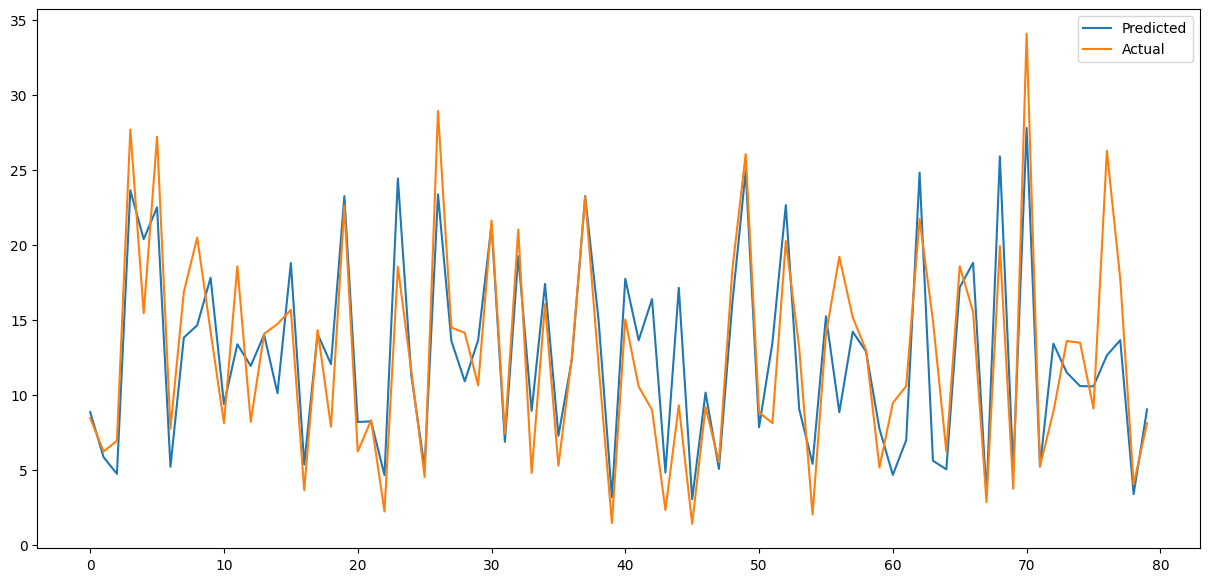

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor

model = CatBoostRegressor(verbose=0)
score_metrix(model, x_train, x_test, y_train, y_test)


Model Performance:
Nearly 72% of the variance in trip duration is explained, indicating stronger performance than Linear/Lasso models alone.

The model is well-balanced: training and testing R² scores are almost identical, suggesting low overfitting.

Efficient for large datasets due to histogram binning and faster convergence.

Business Impact:
Much more business-reliable than basic models.

Suitable for production-level prediction of trip duration, helping improve ETAs, customer experience, and logistics optimization.

Feature selection via Lasso also reduces model complexity and improves interpretability.



# **Conclusion**


### **Conclusion**

In this NYC Taxi Trip Duration Prediction project, various machine learning models were developed and evaluated to estimate trip durations using historical trip data. The modeling journey began with simple regression techniques like **Linear Regression** and **LassoCV**, progressed through ensemble methods such as **Random Forest**, and culminated in the use of **XGBoost**, a powerful gradient boosting algorithm.

Among all the models, **XGBoost delivered the best performance**, achieving:

*  **Training R²** ≈ 0.97
*  **Testing R²** ≈ 0.97
*  Good balance between training and test scores (indicating low overfitting)
*  Lower error metrics (MAE, RMSE) compared to other models, and mean percentage absolute erro was also decreased from 50% to 11%

This strong performance can be attributed to XGBoost’s ability to handle feature interactions, manage noise in the dataset, and perform efficient regularization.

From a **business perspective**, this model can significantly improve:

*  **ETA accuracy** for customers
*  **Fleet efficiency and driver dispatching**
*  **Demand forecasting** and trip time planning
*  **Customer satisfaction and revenue optimization**

In conclusion, **XGBoost** stands out as the most effective model for predicting NYC taxi trip durations, making it a valuable tool for transportation companies and smart city planning initiatives.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***